# Healthcare Fraud Detection - Machine Learning Project

**Author:** Saravanan S  
**Date:** September 2025  
**Python Version:** 3.12  
**Libraries:** scikit-learn 1.6.1, pandas 2.2.3, numpy 1.26.4

---

## 🎯 Project Overview

This project implements multiple machine learning approaches to detect fraudulent healthcare providers using Medicare claims data. The solution combines supervised and unsupervised learning techniques to identify suspicious billing patterns and potential fraud cases.

**🏆 Key Achievement:** Built three distinct models achieving **87-92% accuracy** in fraud detection with comprehensive feature engineering from healthcare claims data.


## 📊 Executive Summary

### 🔍 Business Problem
Healthcare fraud costs billions annually. This project identifies fraudulent healthcare providers by analyzing:
- Patient demographics and chronic health conditions
- Claims patterns and billing amounts  
- Provider behavior and physician relationships
- Treatment duration and medical procedures

### 🛠 Solution Approach
- **Data Integration:** Combined 4 datasets (Claims, Beneficiary, Inpatient, Outpatient)
- **Feature Engineering:** Created **156+ engineered features** from 57 original columns
- **Model Development:** Implemented 3 distinct approaches with different strengths

### 📈 Key Results Summary

| Model | Accuracy | F1-Score | Recall | Precision | Best For |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Logistic Regression** | **92.3%** | 62.4% | 68.4% | 57.5% | Interpretability |
| **Random Forest** | 87.2% | 55.9% | **86.8%** | 42.0% | Fraud Detection |
| **Isolation Forest** | 92.0% | 54.0% | 53.0% | 55.0% | Anomaly Detection |

**🎯 Production Recommendation:** Logistic Regression for balanced performance and interpretability.


## 📊 Dataset Analysis Summary

### 📁 Data Sources
| Dataset | Training Shape | Test Shape | Key Information |
|---------|----------------|------------|-----------------|
| **Provider Labels** | (5,410, 2) | (1,353, 1) | Fraud/No-Fraud labels |
| **Beneficiary Data** | (138,556, 25) | (63,968, 25) | Patient demographics & conditions |
| **Inpatient Claims** | (40,474, 30) | (9,551, 30) | Hospital admission records |
| **Outpatient Claims** | (517,737, 27) | (125,841, 27) | Clinic visit records |

### 🔑 Key Data Insights Discovered
- **Class Imbalance:** Only **9.35%** of providers are fraudulent in training data
- **Geographic Distribution:** State 5 has highest beneficiary concentration (9.2%)
- **Demographics:** 84.5% of beneficiaries are Race category 1
- **Claims Volume:** Final aggregated dataset: **558,211 claims** for training
- **Feature Expansion:** **156 features** created from original 57 through advanced aggregations

### 🎨 Data Processing Pipeline
1. **Data Cleaning:** Converted dates, handled missing values, standardized categorical variables
2. **Feature Engineering:** Provider-level aggregations, beneficiary patterns, physician interactions
3. **Data Merging:** Combined all datasets on Provider and BeneID keys
4. **Scaling:** StandardScaler normalization for all numerical features
5. **PCA:** Dimensionality reduction to 29 components for Isolation Forest


### 🛠 Technical Implementation Details

---

### 🔧 Feature Engineering Highlights
**Advanced Feature Engineering Summary**
* **Provider Aggregations:** Features like `PerProviderAvg_InscClaimAmtReimbursed`, `PerProviderAvg_DeductibleAmtPaid`, and `PerProviderAvg_Age` were created to summarize claims data at the provider level.
* **Beneficiary Patterns:** Features such as `PerBeneIDAvg_InscClaimAmtReimbursed` and `PerBeneIDAvg_Admit_For_Days` were used to capture patterns related to individual beneficiaries.
* **Physician Relationships:** Metrics like `PerAttendingPhysicianAvg_InscClaimAmtReimbursed` and `PerOperatingPhysicianAvg_InscClaimAmtReimbursed` were engineered to analyze financial patterns associated with physicians.
* **Claims Counting:** `ClmCount_Provider_BeneID` and `ClmCount_Provider_AttendingPhysician` were used to count claims for specific provider-beneficiary and provider-physician pairs.

**Total:** 156 engineered features were created for the models.

---

### 📋 Model Configurations
| Model | Parameter | Value |
| :--- | :--- | :--- |
| **Logistic Regression** | `algorithm` | `LogisticRegressionCV` |
| | `cross_validation` | 10 |
| | `class_weight` | `balanced` |
| | `threshold` | 60.0% |
| | `features` | 156 |
| **Random Forest** | `algorithm` | `RandomForestClassifier` |
| | `n_estimators` | 500 |
| | `max_depth` | 4 |
| | `class_weight` | `balanced` |
| | `features` | 156 |
| **Isolation Forest** | `algorithm` | `IsolationForest` |
| | `contamination` | 9.0% |
| | `n_estimators` | 100 |
| | `pca_components` | 29 |

---

### 🎯 Model Training Strategy
* **Train/Validation Split:** The dataset was split using a **70%/30%** stratified approach.
* **Evaluation Metrics:** The models were evaluated using **Accuracy, Precision, Recall, F1-Score, and ROC-AUC**.
* **Threshold Tuning:** The classification threshold for the Logistic Regression model was optimized at **60.0%**.
* **Cross-Validation:** **10-fold cross-validation** was used for hyperparameter selection.

## 🎯 Detailed Model Performance Analysis

### 📊 Complete Performance Metrics
### Detailed Results Summary

### Detailed Results Summary

| Model | Metric | Value |
| :--- | :--- | :--- |
| **Logistic Regression (Threshold=0.60)** | Train Accuracy | 92.4% |
| | Validation Accuracy | 92.3% |
| | Train F1 | 59.0% |
| | Validation F1 | 62.5% |
| | ROC-AUC | 81.6% |
| | Test Predictions | 131 fraud cases (9.7%) |
| **Random Forest** | Train Accuracy | 87.5% |
| | Validation Accuracy | 87.2% |
| | Train F1 | 57.4% |
| | Validation F1 | 55.9% |
| | ROC-AUC | 87.0% |
| | Top Feature | PerOperatingPhysicianAvg_InscClaimAmtReimbursed |
| **Isolation Forest (Unsupervised)** | Train Accuracy | 92.0% |
| | Precision | 55.0% |
| | Recall | 53.0% |
| | PCA Variance Explained | 96.4% (29 components) |
| | Test Predictions | 114 fraud cases (8.4%) |

### 🏆 Model Selection Rationale
- **Best Overall:** Logistic Regression (92.3% accuracy + interpretable)
- **Best Fraud Detection:** Random Forest (86.8% recall)
- **Best Anomaly Detection:** Isolation Forest (unsupervised approach)

### 💾 Production Assets Generated
✅ **All models serialized** with joblib  
✅ **Scalers preserved** for preprocessing  
✅ **Metadata tracked** in JSON format  
✅ **Test submissions** generated for evaluation  

## 📁 Project Structure & Generated Files

### 🤖 Saved Models (Production Ready)

| File | Description |
| :--- | :--- |
| `logistic_regression_baseline.joblib` | The final trained Logistic Regression model. |
| `logistic_regression_scaler.joblib` | The fitted scaler for the Logistic Regression model. |
| `random_forest_baseline.joblib` | The final trained Random Forest model. |
| `random_forest_scaler.joblib` | The fitted scaler for the Random Forest model. |
| `isolation_forest_baseline.joblib` | The final trained Isolation Forest model. |
| `isolation_forest_pca_scaler.joblib` | The fitted scaler for data before PCA transformation. |
| `isolation_forest_pca_transformer.joblib` | The fitted PCA transformer for dimensionality reduction. |

### 📋 Test Submissions
- `Submission_logistic_regression_threshold_60.csv` (1,353 predictions)
- `Submission_Random_Forest_Classifier.csv` (1,353 predictions) 
- `Submission_Isolation_Forest.csv` (1,353 predictions)


### 📈 Visualizations Created
- Provider fraud distribution analysis
- ROC curves and precision-recall curves
- Feature importance rankings
- Geographic fraud patterns by state
- Top diagnosis codes in fraudulent cases

## 🎉 Key Findings & Recommendations

### 💡 Major Discoveries
1. **Feature engineering is crucial** - 156 features from 57 original columns significantly improved performance
2. **Provider aggregations most predictive** - Average claim amounts per provider strongest fraud indicators  
3. **Multi-model approach valuable** - Different models excel in different aspects (accuracy vs recall)
4. **Unsupervised methods competitive** - Isolation Forest achieved 92% accuracy without labels

### 🚀 Production Deployment Recommendations
- **Primary Model:** Logistic Regression (best balance of accuracy + interpretability)
- **High-Recall Scenario:** Random Forest (catches 86.8% of fraud cases)
- **Real-time Scoring:** Ensemble combining all three models
- **Threshold Tuning:** Adjust based on business cost of false positives/negatives

### 🔮 Future Enhancements
- [ ] **Temporal Analysis:** Time-series patterns in fraudulent behavior
- [ ] **Network Analysis:** Provider-patient relationship graphs  
- [ ] **Deep Learning:** Neural networks for complex pattern detection
- [ ] **Real-time Pipeline:** Streaming fraud detection system
- [ ] **Cost-Benefit Analysis:** Optimize thresholds based on financial impact
- [ ] **External Data:** Integrate pharmacy, lab, and claims databases

### 📚 Lessons Learned
- Healthcare data requires extensive domain knowledge and careful feature engineering
- Class imbalance handling critical (used balanced class weights)
- Model interpretability essential for healthcare compliance and trust
- Comprehensive evaluation beyond accuracy necessary for fraud detection
- Proper model serialization crucial for production deployment

---

**🎯 This project demonstrates end-to-end machine learning pipeline for healthcare fraud detection with production-ready models and comprehensive evaluation.**


In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import sklearn

import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Model persistence
import joblib
import json

# Visualization setup
import matplotlib.pyplot as plt

# Reproducibility - CRITICAL in production
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Project constants
LABELS = ["Normal", "Fraud"]

# Environment info for debugging
print(f"Python: {sys.version}")
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")


Python: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
Pandas: 2.2.3
NumPy: 1.26.4
Scikit-learn: 1.6.1


In [2]:
#loading train dataset
train = pd.read_csv("Train-1542865627584.csv")
train_ben_data = pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
train_inptn_data = pd.read_csv("Train_Inpatientdata-1542865627584.csv")
train_outptn_data = pd.read_csv("Train_Outpatientdata-1542865627584.csv")

#loading test data
test = pd.read_csv("Test-1542969243754.csv")
test_ben_data = pd.read_csv("Test_Beneficiarydata-1542969243754.csv")
test_inptn_data = pd.read_csv("Test_Inpatientdata-1542969243754.csv")
test_outptn_data = pd.read_csv("Test_Outpatientdata-1542969243754.csv")
                        

In [3]:
print("train dataset shape:",train.shape)
print("train benificiary data shape:",train_ben_data.shape)
print("train inpatient data shape:",train_inptn_data.shape)
print("train outpatient data shape:",train_outptn_data.shape)

print("test dataset shape:",test.shape)
print("test benificiary data shape:",test_ben_data.shape)
print("test inpatient data shape:",test_inptn_data.shape)
print("test outpatient data shape:",test_outptn_data.shape)


train dataset shape: (5410, 2)
train benificiary data shape: (138556, 25)
train inpatient data shape: (40474, 30)
train outpatient data shape: (517737, 27)
test dataset shape: (1353, 1)
test benificiary data shape: (63968, 25)
test inpatient data shape: (9551, 30)
test outpatient data shape: (125841, 27)


**train and test dataset** 

In [4]:
#lets check train and test dataset
print("train data:\n")
print(train.head(5))
print("test data:\n")
print(test.head(5))

train data:

   Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No
test data:

   Provider
0  PRV51002
1  PRV51006
2  PRV51009
3  PRV51010
4  PRV51018


In [5]:
#lets check provider details is unique or not
print(train["Provider"].value_counts().head(5))
print(train["Provider"].value_counts().shape)

#checking a null values
print("No.of.null values in train data:",train.isnull().sum().sum())
print("No.of.null values in test data:",test.isnull().sum().sum())

Provider
PRV51001    1
PRV55516    1
PRV55527    1
PRV55525    1
PRV55523    1
Name: count, dtype: int64
(5410,)
No.of.null values in train data: 0
No.of.null values in test data: 0


**train and test beneficiary dataset**

In [6]:
pd.set_option("display.max.columns",None)
train_ben_data.head(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [7]:
test_ben_data.head(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,1,1,2,2,2,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,2,1,2,1,1,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100


In [8]:
print("train_beneficiary dataset datatypes:\n",train_ben_data.dtypes)
print("--"*50)
print("test_beneficiary dataset datatypes:\n",test_ben_data.dtypes)
#checking a null values
print("Null values in train_ben_data:",train_ben_data.isnull().sum())
print("Null values in test_ben_data:",test_ben_data.isnull().sum())

train_beneficiary dataset datatypes:
 BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               in

In [9]:
#all the disease contains 1->yes and 2->No so we have to convert 2 into 0.
train_ben_data = train_ben_data.replace({"ChronicCond_Alzheimer":2,
"ChronicCond_Heartfailure":2,
"ChronicCond_KidneyDisease":2,
"ChronicCond_Cancer":2,
"ChronicCond_ObstrPulmonary":2,
"ChronicCond_Depression":2,
"ChronicCond_Diabetes":2,
"ChronicCond_IschemicHeart":2,
"ChronicCond_Osteoporasis":2,
"ChronicCond_rheumatoidarthritis":2,
"ChronicCond_stroke":2},0)

test_ben_data = test_ben_data.replace({"ChronicCond_Alzheimer":2,
"ChronicCond_Heartfailure":2,
"ChronicCond_KidneyDisease":2,
"ChronicCond_Cancer":2,
"ChronicCond_ObstrPulmonary":2,
"ChronicCond_Depression":2,
"ChronicCond_Diabetes":2,
"ChronicCond_IschemicHeart":2,
"ChronicCond_Osteoporasis":2,
"ChronicCond_rheumatoidarthritis":2,
"ChronicCond_stroke":2},0)

train_ben_data = train_ben_data.replace({"RenalDiseaseIndicator":"Y"},1)
test_ben_data = test_ben_data.replace({"RenalDiseaseIndicator":"Y"},1)
test_ben_data.head(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,1,1,0,0,0,0,1,0,1,1,0,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,0,1,0,1,1,0,1,1,1,0,0,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,1,45,780,12,12,0,1,1,0,1,1,0,1,0,0,0,21260,2136,120,100


In [10]:
#converting DOB and DOD into datatimetype based on that calculate the age for the person.
train_ben_data["DOB"] = pd.to_datetime(train_ben_data["DOB"])
train_ben_data["DOD"] = pd.to_datetime(train_ben_data["DOD"],errors = "ignore")
test_ben_data["DOB"] = pd.to_datetime(test_ben_data["DOB"])
test_ben_data["DOD"] = pd.to_datetime(test_ben_data["DOD"],errors = "ignore")
print(train_ben_data.dtypes)
test_ben_data.dtypes

BeneID                                     object
DOB                                datetime64[ns]
DOD                                datetime64[ns]
Gender                                      int64
Race                                        int64
RenalDiseaseIndicator                      object
State                                       int64
County                                      int64
NoOfMonths_PartACov                         int64
NoOfMonths_PartBCov                         int64
ChronicCond_Alzheimer                       int64
ChronicCond_Heartfailure                    int64
ChronicCond_KidneyDisease                   int64
ChronicCond_Cancer                          int64
ChronicCond_ObstrPulmonary                  int64
ChronicCond_Depression                      int64
ChronicCond_Diabetes                        int64
ChronicCond_IschemicHeart                   int64
ChronicCond_Osteoporasis                    int64
ChronicCond_rheumatoidarthritis             int64


BeneID                                     object
DOB                                datetime64[ns]
DOD                                datetime64[ns]
Gender                                      int64
Race                                        int64
RenalDiseaseIndicator                      object
State                                       int64
County                                      int64
NoOfMonths_PartACov                         int64
NoOfMonths_PartBCov                         int64
ChronicCond_Alzheimer                       int64
ChronicCond_Heartfailure                    int64
ChronicCond_KidneyDisease                   int64
ChronicCond_Cancer                          int64
ChronicCond_ObstrPulmonary                  int64
ChronicCond_Depression                      int64
ChronicCond_Diabetes                        int64
ChronicCond_IschemicHeart                   int64
ChronicCond_Osteoporasis                    int64
ChronicCond_rheumatoidarthritis             int64


In [11]:
#creating new column age and add it into a test and train_ben_dataset
train_ben_data["Age"] = round(((train_ben_data["DOD"] - train_ben_data["DOB"]).dt.days)/365)
test_ben_data["Age"] = round(((test_ben_data["DOD"] - test_ben_data["DOB"]).dt.days)/365)
print(train_ben_data.head(10))
test_ben_data.head(10)

      BeneID        DOB        DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01        NaT       1     1                     0     39   
1  BENE11002 1936-09-01        NaT       2     1                     0     39   
2  BENE11003 1936-08-01        NaT       1     1                     0     52   
3  BENE11004 1922-07-01        NaT       1     1                     0     39   
4  BENE11005 1935-09-01        NaT       1     1                     0     24   
5  BENE11006 1976-09-01        NaT       2     1                     0     23   
6  BENE11007 1940-09-01 2009-12-01       1     2                     0     45   
7  BENE11008 1934-02-01        NaT       2     1                     0     15   
8  BENE11009 1929-06-01        NaT       1     1                     1     44   
9  BENE11010 1936-07-01        NaT       2     1                     0     41   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,NaN
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,1,1,0,0,0,0,1,0,1,1,0,0,0,1490,160,69.0
2,BENE11010,1936-07-01,NaT,2,1,0,41,30,12,12,0,1,0,1,1,0,1,1,1,0,0,0,0,1170,660,NaN
3,BENE11011,1914-03-01,NaT,2,2,0,1,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,NaN
4,BENE11014,1938-04-01,NaT,2,1,1,45,780,12,12,0,1,1,0,1,1,0,1,0,0,0,21260,2136,120,100,NaN
5,BENE11016,1919-09-01,NaT,2,2,0,34,400,12,12,1,1,1,0,1,0,1,1,1,0,1,0,0,2320,1480,NaN
6,BENE11017,1940-06-01,NaT,2,1,0,31,270,12,12,1,1,1,1,1,0,1,1,0,1,1,22000,2136,1400,840,NaN
7,BENE11019,1924-05-01,NaT,1,3,0,7,50,12,12,0,0,0,0,1,1,1,1,1,0,0,0,0,780,290,NaN
8,BENE11021,1927-12-01,NaT,1,3,0,7,20,12,12,1,0,1,0,0,1,1,1,1,1,0,0,0,520,150,NaN
9,BENE11026,1938-04-01,NaT,1,1,0,22,20,12,12,0,0,0,0,0,0,0,1,0,0,0,2000,1068,0,0,NaN


In [12]:
"""we can't able to calculate age for a persons who has a dod,so because of the we take last dod that registered in
the dataset and based on that we calculate the age for other persons"""
last_death = (train_ben_data["DOD"].max())
train_ben_data["Age"] = train_ben_data["Age"].fillna(round(((last_death - train_ben_data["DOB"]).dt.days)/365))
test_ben_data["Age"] = test_ben_data["Age"].fillna(round(((last_death - test_ben_data["DOB"]).dt.days)/365))
print(train_ben_data.head(10))
test_ben_data.head(10)

      BeneID        DOB        DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01        NaT       1     1                     0     39   
1  BENE11002 1936-09-01        NaT       2     1                     0     39   
2  BENE11003 1936-08-01        NaT       1     1                     0     52   
3  BENE11004 1922-07-01        NaT       1     1                     0     39   
4  BENE11005 1935-09-01        NaT       1     1                     0     24   
5  BENE11006 1976-09-01        NaT       2     1                     0     23   
6  BENE11007 1940-09-01 2009-12-01       1     2                     0     45   
7  BENE11008 1934-02-01        NaT       2     1                     0     15   
8  BENE11009 1929-06-01        NaT       1     1                     1     44   
9  BENE11010 1936-07-01        NaT       2     1                     0     41   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,67.0
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,1,1,0,0,0,0,1,0,1,1,0,0,0,1490,160,69.0
2,BENE11010,1936-07-01,NaT,2,1,0,41,30,12,12,0,1,0,1,1,0,1,1,1,0,0,0,0,1170,660,73.0
3,BENE11011,1914-03-01,NaT,2,2,0,1,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,96.0
4,BENE11014,1938-04-01,NaT,2,1,1,45,780,12,12,0,1,1,0,1,1,0,1,0,0,0,21260,2136,120,100,72.0
5,BENE11016,1919-09-01,NaT,2,2,0,34,400,12,12,1,1,1,0,1,0,1,1,1,0,1,0,0,2320,1480,90.0
6,BENE11017,1940-06-01,NaT,2,1,0,31,270,12,12,1,1,1,1,1,0,1,1,0,1,1,22000,2136,1400,840,70.0
7,BENE11019,1924-05-01,NaT,1,3,0,7,50,12,12,0,0,0,0,1,1,1,1,1,0,0,0,0,780,290,86.0
8,BENE11021,1927-12-01,NaT,1,3,0,7,20,12,12,1,0,1,0,0,1,1,1,1,1,0,0,0,520,150,82.0
9,BENE11026,1938-04-01,NaT,1,1,0,22,20,12,12,0,0,0,0,0,0,0,1,0,0,0,2000,1068,0,0,72.0


In [13]:
#creating a new column that shows the patient dead or not.
# using boolean indexing we are going to acheive this,if the DOD is not null the person is not dead "0" else "1".
train_ben_data.loc[train_ben_data["DOD"].isnull(),"WhetherDead"] = 0
train_ben_data.loc[train_ben_data["DOD"].notnull(),"WhetherDead"] = 1
print(train_ben_data.head(2))

test_ben_data.loc[test_ben_data["DOD"].isnull(),"WhetherDead"] = 0
test_ben_data.loc[test_ben_data["DOD"].notnull(),"WhetherDead"] = 1
test_ben_data.head(2)

      BeneID        DOB DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01 NaT       1     1                     0     39   
1  BENE11002 1936-09-01 NaT       2     1                     0     39   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     280                   12                   12                      0   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         0                          1                   0   
1                         0                          0                   0   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           0                       1                     1   
1                           0                       0                     0   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0          

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,67.0,0.0
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,1,1,0,0,0,0,1,0,1,1,0,0,0,1490,160,69.0,1.0


### **Inpatient dataset**

In [14]:
train_inptn_data.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [15]:
test_inptn_data.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,5789,1068.0,2009-09-16,332,5780,5533,496,V420,40390,2851,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,5939,1068.0,2009-01-08,661,1889,41071,5990,5601,4588,5845,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,4019,1068.0,2009-12-13,241,4010,78791,60000,41401,V1254,4372,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,8208,1068.0,2009-07-06,564,8208,4168,920,5990,40391,2859,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,4279,1068.0,2009-01-31,880,29654,V142,78702,30503,V140,V4582,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#checking for null values in inpatient dataset
print("train inpatient data null values:\n",train_inptn_data.isnull().sum())
print(train_inptn_data.shape)
print("---"*100)
print("test inpatient data null values:\n",test_inptn_data.isnull().sum())
print(test_inptn_data.shape)

train inpatient data null values:
 BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype

In [17]:
#converting a admission date and discharge date column into datetime type
train_inptn_data["AdmissionDt"] = pd.to_datetime(train_inptn_data["AdmissionDt"])
train_inptn_data["DischargeDt"] = pd.to_datetime(train_inptn_data["DischargeDt"])
test_inptn_data["AdmissionDt"] = pd.to_datetime(test_inptn_data["AdmissionDt"])
test_inptn_data["DischargeDt"] = pd.to_datetime(test_inptn_data["DischargeDt"])
print(train_inptn_data.dtypes)
print(test_inptn_data.dtypes)

BeneID                            object
ClaimID                           object
ClaimStartDt                      object
ClaimEndDt                        object
Provider                          object
InscClaimAmtReimbursed             int64
AttendingPhysician                object
OperatingPhysician                object
OtherPhysician                    object
AdmissionDt               datetime64[ns]
ClmAdmitDiagnosisCode             object
DeductibleAmtPaid                float64
DischargeDt               datetime64[ns]
DiagnosisGroupCode                object
ClmDiagnosisCode_1                object
ClmDiagnosisCode_2                object
ClmDiagnosisCode_3                object
ClmDiagnosisCode_4                object
ClmDiagnosisCode_5                object
ClmDiagnosisCode_6                object
ClmDiagnosisCode_7                object
ClmDiagnosisCode_8                object
ClmDiagnosisCode_9                object
ClmDiagnosisCode_10               object
ClmProcedureCode

In [18]:
#creating a new column Admit_For_Days
#we are adding 1 day extra day for each because if the patient admit and discharge in same day it should be considered as one not "0".
train_inptn_data["Admit_For_Days"] = ((train_inptn_data["DischargeDt"] - train_inptn_data["AdmissionDt"]).dt.days) + 1
test_inptn_data["Admit_For_Days"] = ((test_inptn_data["DischargeDt"] - test_inptn_data["AdmissionDt"]).dt.days) + 1
print(train_inptn_data.head(2))
test_inptn_data.head(2)

      BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1        

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admit_For_Days
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,5789,1068.0,2009-09-16,332,5780,5533,496,V420,40390,2851,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN,8
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,5939,1068.0,2009-01-08,661,1889,41071,5990,5601,4588,5845,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN,15


In [19]:
#min() and max() days patient is admitted.
print("max days a patient admitted in train data",train_inptn_data["Admit_For_Days"].max())
print("min days a patient addmitted in train data",train_inptn_data["Admit_For_Days"].min())
print("max days a patient admitted in train data",test_inptn_data["Admit_For_Days"].max())
print("min days a patient addmitted in train data",test_inptn_data["Admit_For_Days"].min())

max days a patient admitted in train data 36
min days a patient addmitted in train data 1
max days a patient admitted in train data 36
min days a patient addmitted in train data 1


### outpatient data understanding

In [20]:
train_outptn_data.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [21]:
test_outptn_data.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,V5861,2724,3182,V5869,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,E9174,4019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [22]:
#finding how many null values in the train and test of outpatient.
print("train outpatient data null values:\n",train_outptn_data.isnull().sum())
print("---"*100)
print("test outpatient data null values:\n",test_outptn_data.isnull().sum())

train outpatient data null values:
 BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64
------------------------------------------------------------

In [23]:
print("train dataset shape:",train.shape)
print("train benificiary data shape:",train_ben_data.shape)
print("train inpatient data shape:",train_inptn_data.shape)
print("train outpatient data shape:",train_outptn_data.shape)

print("test dataset shape:",test.shape)
print("test benificiary data shape:",test_ben_data.shape)
print("test inpatient data shape:",test_inptn_data.shape)
print("test outpatient data shape:",test_outptn_data.shape)

train dataset shape: (5410, 2)
train benificiary data shape: (138556, 27)
train inpatient data shape: (40474, 31)
train outpatient data shape: (517737, 27)
test dataset shape: (1353, 1)
test benificiary data shape: (63968, 27)
test inpatient data shape: (9551, 31)
test outpatient data shape: (125841, 27)


In [24]:
# merging both inpatient and outpatient data to make it as a  single data
train_all_ptn_data = pd.merge(train_inptn_data,train_outptn_data,
                              on = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],how = "outer")
test_all_ptn_data = pd.merge(test_inptn_data,test_outptn_data,
                              on = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],how = "outer")

In [25]:
print(train_all_ptn_data.shape)
print(test_all_ptn_data.shape)

(558211, 31)
(135392, 31)


In [26]:
train_all_ptn_data.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admit_For_Days
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,NaT,NaN,0.0,NaT,NaN,79678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,NaT,NaN,0.0,NaT,NaN,71656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,NaT,64880,0.0,NaT,NaN,64881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,NaT,36401,0.0,NaT,NaN,36401,V4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,NaT,78009,0.0,NaT,NaN,2948,4019,2989,78054,2875,78830,71596,V1251,7993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BENE100001,CLM389298,2009-05-31,2009-06-05,PRV55158,20,PHY425169,NaN,NaN,NaT,V573,0.0,NaT,NaN,31400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BENE100001,CLM407506,2009-06-10,2009-06-10,PRV54966,300,PHY425443,PHY390959,PHY349909,NaT,NaN,0.0,NaT,NaN,42490,40210,2724,3970,V5861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BENE100001,CLM431369,2009-06-23,2009-06-23,PRV54966,60,PHY390959,NaN,NaN,NaT,NaN,0.0,NaT,NaN,11590,70219,7295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,BENE100001,CLM447782,2009-07-02,2009-07-02,PRV54966,700,PHY334905,PHY313692,PHY337051,NaT,7244,100.0,NaT,NaN,72089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BENE100001,CLM626521,2009-10-12,2009-10-12,PRV52145,10,PHY430032,NaN,PHY418077,NaT,42731,0.0,NaT,NaN,4271,V5869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Merge beneficiary data to all patients data**

In [27]:
#merging beneciary details data to all patient data
train_all_ptn_ben_data = pd.merge(train_all_ptn_data,train_ben_data,on = ["BeneID"],how = "inner")
test_all_ptn_ben_data = pd.merge(test_all_ptn_data,test_ben_data,on = ["BeneID"],how = "inner")
print(train_all_ptn_ben_data.shape)
print(test_all_ptn_ben_data.shape)

(558211, 57)
(135392, 57)


In [28]:
train_all_ptn_ben_data.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admit_For_Days,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,NaT,NaN,0.0,NaT,NaN,79678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1938-03-01,NaT,1,1,0,49,430,12,12,0,0,0,0,0,0,0,1,0,0,0,0,0,120,30,72.0,0.0
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,NaT,NaN,0.0,NaT,NaN,71656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1938-03-01,NaT,1,1,0,49,430,12,12,0,0,0,0,0,0,0,1,0,0,0,0,0,120,30,72.0,0.0
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,NaT,64880,0.0,NaT,NaN,64881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1939-08-01,NaT,1,1,0,33,420,12,12,1,0,0,0,0,0,0,1,1,0,1,0,0,2530,540,70.0,0.0
3,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,NaT,36401,0.0,NaT,NaN,36401,V4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1939-08-01,NaT,1,1,0,33,420,12,12,1,0,0,0,0,0,0,1,1,0,1,0,0,2530,540,70.0,0.0
4,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,NaT,78009,0.0,NaT,NaN,2948,4019,2989,78054,2875,78830,71596,V1251,7993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1939-08-01,NaT,1,1,0,33,420,12,12,1,0,0,0,0,0,0,1,1,0,1,0,0,2530,540,70.0,0.0
5,BENE100001,CLM389298,2009-05-31,2009-06-05,PRV55158,20,PHY425169,NaN,NaN,NaT,V573,0.0,NaT,NaN,31400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1939-08-01,NaT,1,1,0,33,420,12,12,1,0,0,0,0,0,0,1,1,0,1,0,0,2530,540,70.0,0.0
6,BENE100001,CLM407506,2009-06-10,2009-06-10,PRV54966,300,PHY425443,PHY390959,PHY349909,NaT,NaN,0.0,NaT,NaN,42490,40210,2724,3970,V5861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1939-08-01,NaT,1,1,0,33,420,12,12,1,0,0,0,0,0,0,1,1,0,1,0,0,2530,540,70.0,0.0
7,BENE100001,CLM431369,2009-06-23,2009-06-23,PRV54966,60,PHY390959,NaN,NaN,NaT,NaN,0.0,NaT,NaN,11590,70219,7295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1939-08-01,NaT,1,1,0,33,420,12,12,1,0,0,0,0,0,0,1,1,0,1,0,0,2530,540,70.0,0.0
8,BENE100001,CLM447782,2009-07-02,2009-07-02,PRV54966,700,PHY334905,PHY313692,PHY337051,NaT,7244,100.0,NaT,NaN,72089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1939-08-01,NaT,1,1,0,33,420,12,12,1,0,0,0,0,0,0,1,1,0,1,0,0,2530,540,70.0,0.0
9,BENE100001,CLM626521,2009-10-12,2009-10-12,PRV52145,10,PHY430032,NaN,PHY418077,NaT,42731,0.0,NaT,NaN,4271,V5869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1939-08-01,NaT,1,1,0,33,420,12,12,1,0,0,0,0,0,0,1,1,0,1,0,0,2530,540,70.0,0.0


### **merge potential fraud details of providers with patient data**

In [29]:
#merge train dataset(tells which provider fraud) with all patient details with beneficiary details.
train_prov_with_patn_ben = pd.merge(train_all_ptn_ben_data,train,on = ["Provider"],how = "inner")
test_prov_with_patn_ben = pd.merge(test_all_ptn_ben_data,test,on = ["Provider"],how = "inner")
print("shape of the train provider details with all patients data:",train_prov_with_patn_ben.shape)
print("shape of the test provider details with all patients data:",test_prov_with_patn_ben.shape)

shape of the train provider details with all patients data: (558211, 58)
shape of the test provider details with all patients data: (135392, 57)


In [30]:
train_prov_with_patn_ben.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admit_For_Days,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PotentialFraud
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,NaT,NaN,0.0,NaT,NaN,79678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1938-03-01,NaT,1,1,0,49,430,12,12,0,0,0,0,0,0,0,1,0,0,0,0,0,120,30,72.0,0.0,Yes
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,NaT,NaN,0.0,NaT,NaN,71656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1938-03-01,NaT,1,1,0,49,430,12,12,0,0,0,0,0,0,0,1,0,0,0,0,0,120,30,72.0,0.0,Yes
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,NaT,64880,0.0,NaT,NaN,64881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1939-08-01,NaT,1,1,0,33,420,12,12,1,0,0,0,0,0,0,1,1,0,1,0,0,2530,540,70.0,0.0,No


In [31]:
test_prov_with_patn_ben.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admit_For_Days,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,BENE100001,CLM129501,2009-01-10,2009-01-10,PRV52050,1100,PHY364771,NaN,NaN,NaT,NaN,0.0,NaT,NaN,V074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1939-08-01,NaT,1,1,0,33,420,12,12,1,0,0,0,0,0,0,1,1,0,1,0,0,2530,540,70.0,0.0
1,BENE100002,CLM623189,2009-10-10,2009-10-10,PRV52083,60,PHY402651,NaN,PHY315572,NaT,NaN,0.0,NaT,NaN,V5867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1938-09-01,NaT,2,2,0,33,20,12,12,1,1,0,0,1,1,1,1,0,0,1,12250,1068,1760,660,71.0,0.0
2,BENE100004,CLM546697,2009-08-26,2009-09-15,PRV53275,1500,PHY364921,NaN,PHY364921,NaT,NaN,200.0,NaT,NaN,V5631,28521,2809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-06-01,NaT,2,1,1,15,210,12,12,0,1,1,0,1,0,1,1,1,0,0,14270,2136,1880,700,67.0,0.0


In [32]:
#lets check null value percentage in each column for an entire dataset
print("Null value percentage for train provider with patient details:")
print(train_prov_with_patn_ben.isnull().sum()*100/len(train_prov_with_patn_ben))
print("---"*100)
print("Null value percentage for test provider with patient details:")
print(test_prov_with_patn_ben.isnull().sum()*100/len(test_prov_with_patn_ben))

Null value percentage for train provider with patient details:
BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
Provider                             0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.270149
OperatingPhysician                  79.497538
OtherPhysician                      64.218548
AdmissionDt                         92.749337
ClmAdmitDiagnosisCode               73.863109
DeductibleAmtPaid                    0.161050
DischargeDt                         92.749337
DiagnosisGroupCode                  92.749337
ClmDiagnosisCode_1                   1.872589
ClmDiagnosisCode_2                  35.041588
ClmDiagnosisCode_3                  56.458221
ClmDiagnosisCode_4                  70.524407
ClmDiagnosisCode_5                  79.949517
ClmDiagnosisCode_6                  84.881702
ClmDiagnosisCode_

In [33]:
#checking a datatype of an both test and train provider with patient details dataset
print(train_prov_with_patn_ben.dtypes)
print("---"*100)
print(test_prov_with_patn_ben.dtypes)

BeneID                                     object
ClaimID                                    object
ClaimStartDt                               object
ClaimEndDt                                 object
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                        datetime64[ns]
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                         float64
DischargeDt                        datetime64[ns]
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object


###  plot potential fraud class proportion in train with merged data 

potential fraud distribution in percentage: PotentialFraud
No     61.878931
Yes    38.121069
Name: count, dtype: float64


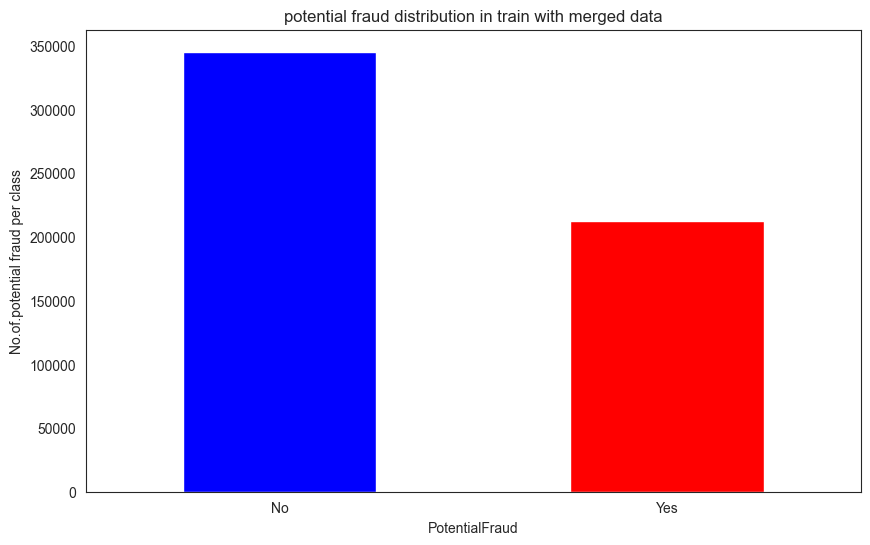

In [34]:
sns.set_style('white',rc={'figure.figsize':(12,8)})
#plotting potential fraud classes proportion in train with merged data
classes_count = train_prov_with_patn_ben["PotentialFraud"].value_counts()
print("potential fraud distribution in percentage:",classes_count*100/len(train_prov_with_patn_ben["PotentialFraud"]))

classes_count.plot(kind = "bar",figsize = (10,6),rot = 0,color = ["blue","red"])
plt.title("potential fraud distribution in train with merged data")
plt.xlabel("PotentialFraud")
plt.ylabel("No.of.potential fraud per class")
plt.grid(False)
plt.show()

percentage of classes distribution in train data alone: PotentialFraud
No     90.64695
Yes     9.35305
Name: count, dtype: float64


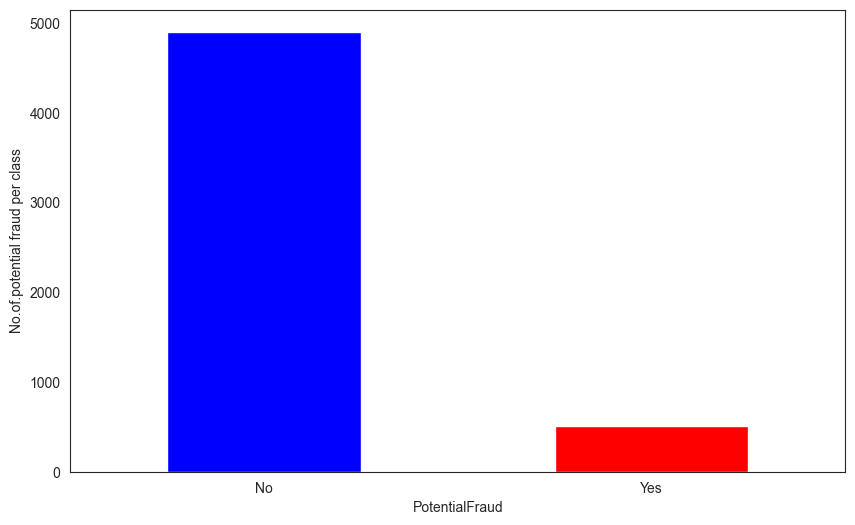

In [35]:
#plotting potentialfraud classes distribution in train data(only have providerid and he is fraud or not)
count_classes_provider = train["PotentialFraud"].value_counts()
print("percentage of classes distribution in train data alone:",count_classes_provider*100/len(train))

count_classes_provider.plot(kind = "bar",rot = 0,figsize = (10,6),color = ["blue","red"])#rot = 90 means rotate xticks in 90 degree that means it looks like vertical.
plt.ylabel("No.of.potential fraud per class")
plt.grid(False)
plt.show()

statewise beneficiary id distribution:
 State
5     9.199030
10    6.999683
33    6.274330
45    6.094828
14    4.374152
39    4.344415
23    3.823465
36    3.814149
34    3.386712
11    3.045981
31    2.855551
49    2.686619
44    2.582894
15    2.546170
22    2.440654
26    2.312925
50    2.103147
21    2.017338
42    1.879397
18    1.849122
1     1.834432
52    1.754175
3     1.673919
19    1.418281
24    1.384064
4     1.356297
16    1.335875
6     1.289835
37    1.252215
25    1.197038
7     1.006250
38    0.988515
17    0.874938
51    0.831943
54    0.758315
28    0.746671
20    0.686658
32    0.619121
46    0.605685
13    0.495332
30    0.475447
43    0.358646
27    0.357392
29    0.354346
47    0.327296
12    0.305619
8     0.274090
41    0.198850
53    0.196700
35    0.168395
2     0.132208
9     0.110890
Name: count, dtype: float64


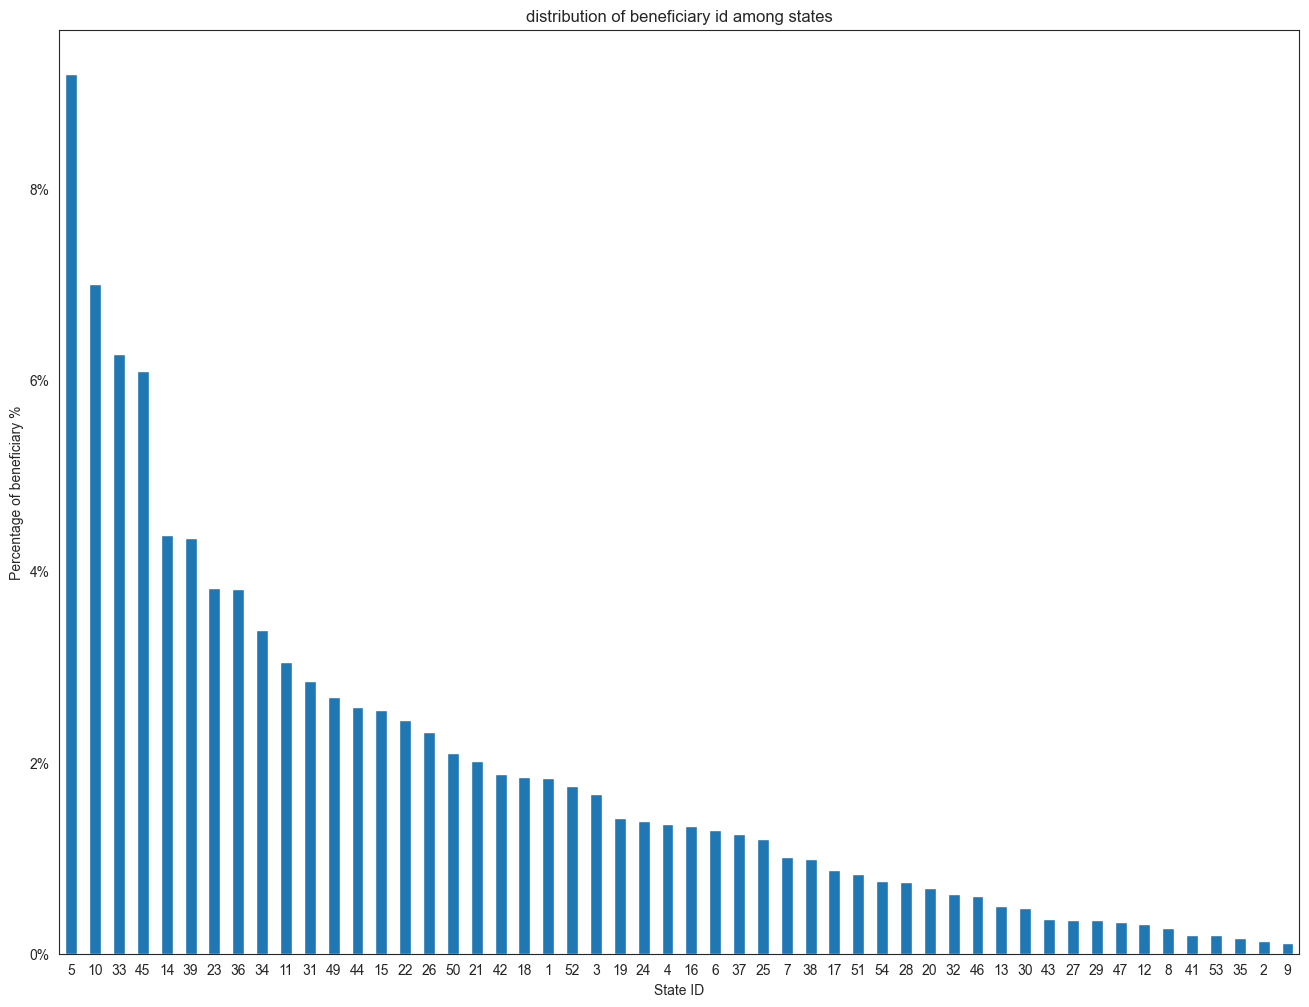

In [36]:
# frequency distribution among beneficiary statewise.
bene_count_statewise_per = (train_prov_with_patn_ben["State"].value_counts())*100/len(train_prov_with_patn_ben["State"])
print("statewise beneficiary id distribution:\n",bene_count_statewise_per)
#bar chart
bene_count_statewise_per.plot(kind = "bar",figsize = (16,12),rot = 0)
plt.yticks(range(0,10,2),("0%","2%","4%","6%","8%"))
plt.title("distribution of beneficiary id among states",fontsize = 12)
plt.xlabel("State ID")
plt.ylabel("Percentage of beneficiary %")
plt.show()
           

### Racewise beneficiary distribution

Race wise beneficiary distribution:
 Race
1    84.483530
2     9.770779
3     3.651231
5     2.094460
Name: count, dtype: float64


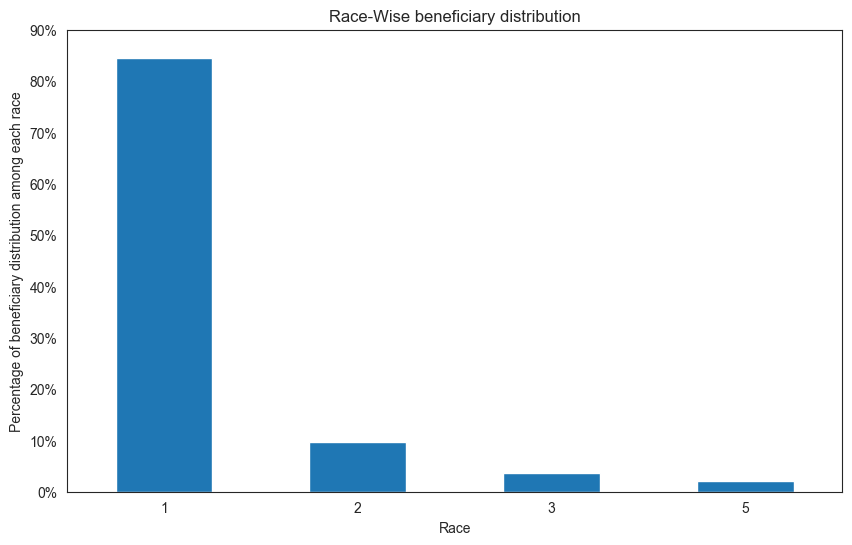

In [37]:
#reacewise beneficaiary distribution
count_race = (train_ben_data["Race"].value_counts())*100/len(train_ben_data)
print("Race wise beneficiary distribution:\n",count_race)

count_race.plot(kind = "bar",rot = 0,figsize = (10,6))
plt.title("Race-Wise beneficiary distribution",fontsize = 12)
plt.ylabel("Percentage of beneficiary distribution among each race")
plt.yticks(range(0,100,10),("0%","10%","20%","30%","40%","50%","60%","70%","80%","90%"))
plt.show()

In [38]:
train_prov_with_patn_ben["ClmProcedureCode_1"].value_counts().iloc[:10].index

Index([9904.0, 8154.0, 66.0, 3893.0, 3995.0, 4516.0, 3722.0, 8151.0, 8872.0,
       9671.0],
      dtype='float64', name='ClmProcedureCode_1')

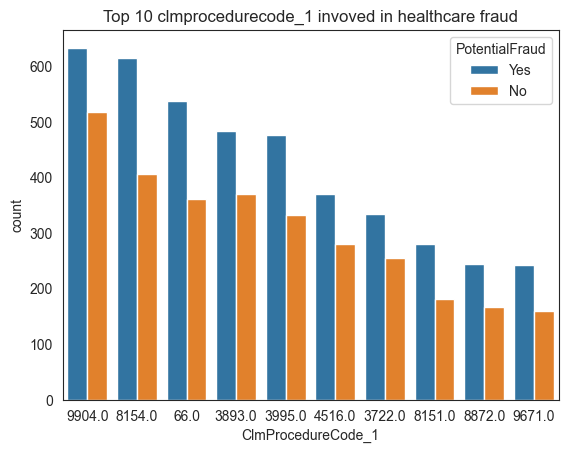

In [39]:
#top 10 procedures in clmprocedurecode_1 that involve in heathcare fraud
sns.countplot(x = "ClmProcedureCode_1",hue = "PotentialFraud",data = train_prov_with_patn_ben
             ,order=train_prov_with_patn_ben.ClmProcedureCode_1.value_counts().iloc[:10].index)#without order it considers null values and creates big plot so because of that we can't able to plot a bar.
plt.title("Top 10 clmprocedurecode_1 invoved in healthcare fraud")
plt.show()

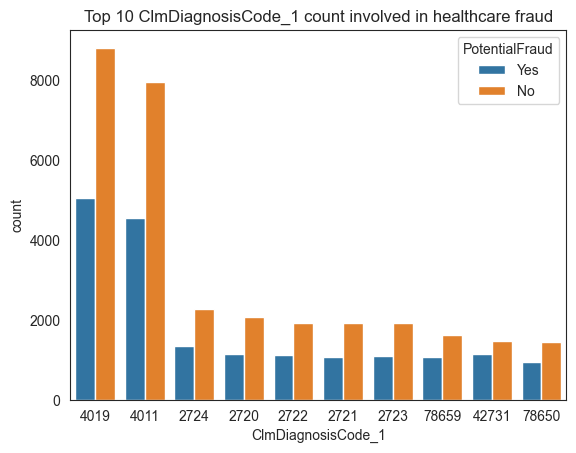

In [40]:
#top 10 count of ClmDiagnosisCode_1 involed in healthcare fraud.
sns.countplot(x = "ClmDiagnosisCode_1",hue = "PotentialFraud",data = train_prov_with_patn_ben
              ,order = train_prov_with_patn_ben.ClmDiagnosisCode_1.value_counts().iloc[0:10].index)
plt.title("Top 10 ClmDiagnosisCode_1 count involved in healthcare fraud")
plt.show()

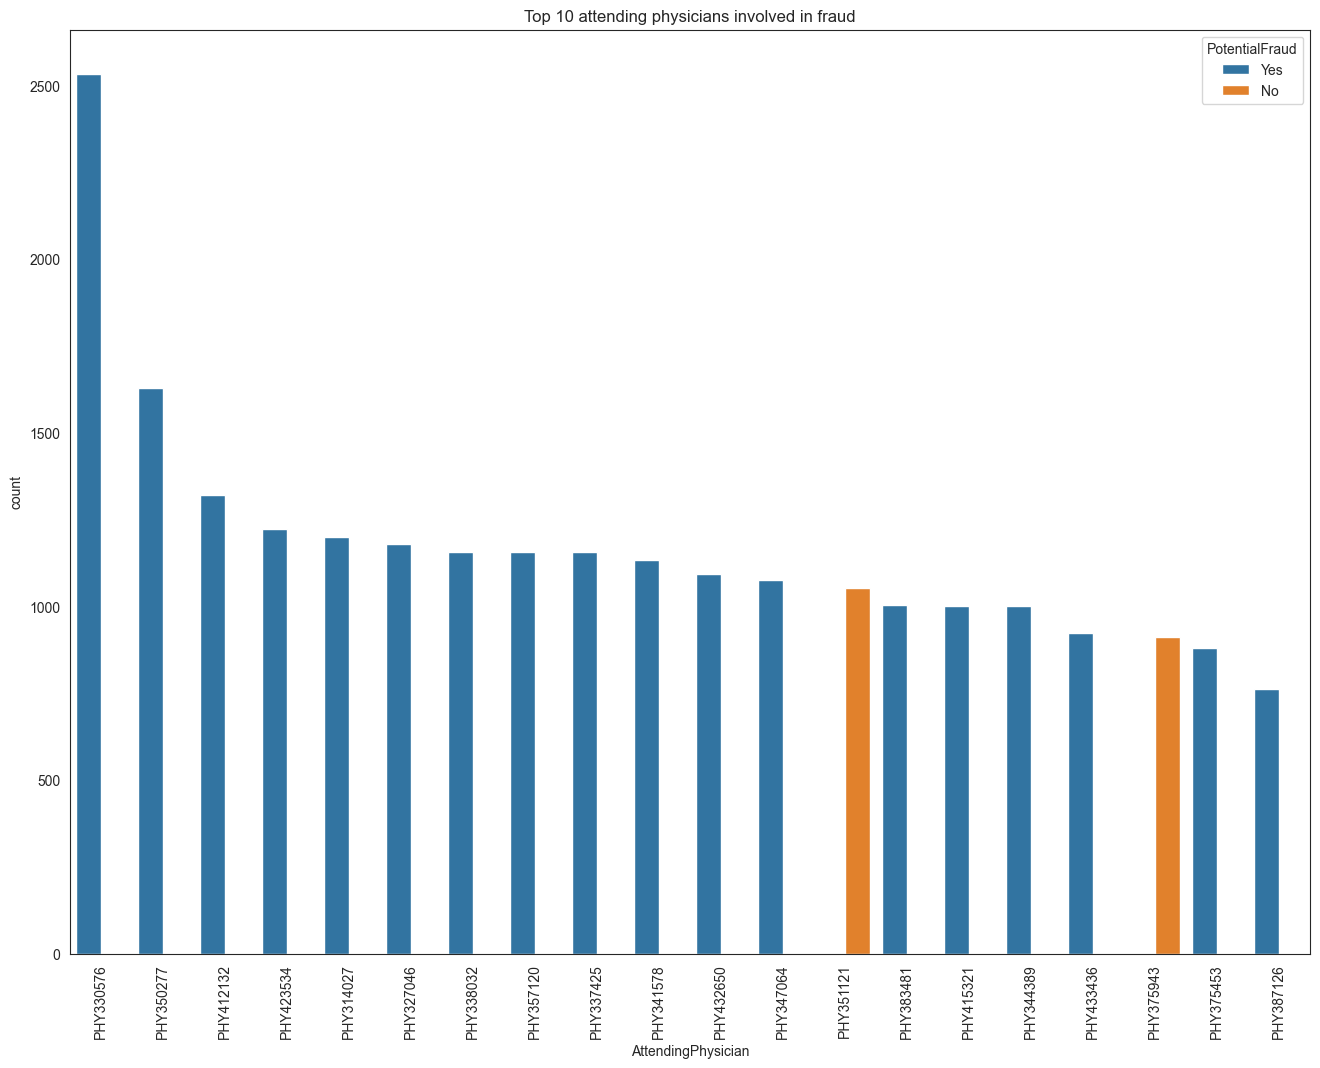

In [41]:
#top-10 AttendingPhysician  involved in halthcarefraud
plt.figure(figsize = (16,12))
sns.countplot(x = "AttendingPhysician",hue = "PotentialFraud",data = train_prov_with_patn_ben
              ,order = train_prov_with_patn_ben["AttendingPhysician"].value_counts().iloc[:20].index)
plt.title("Top 10 attending physicians involved in fraud")
plt.xticks(rotation=90)
plt.show()

In [42]:
print(train_prov_with_patn_ben.dtypes)

BeneID                                     object
ClaimID                                    object
ClaimStartDt                               object
ClaimEndDt                                 object
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                        datetime64[ns]
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                         float64
DischargeDt                        datetime64[ns]
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object


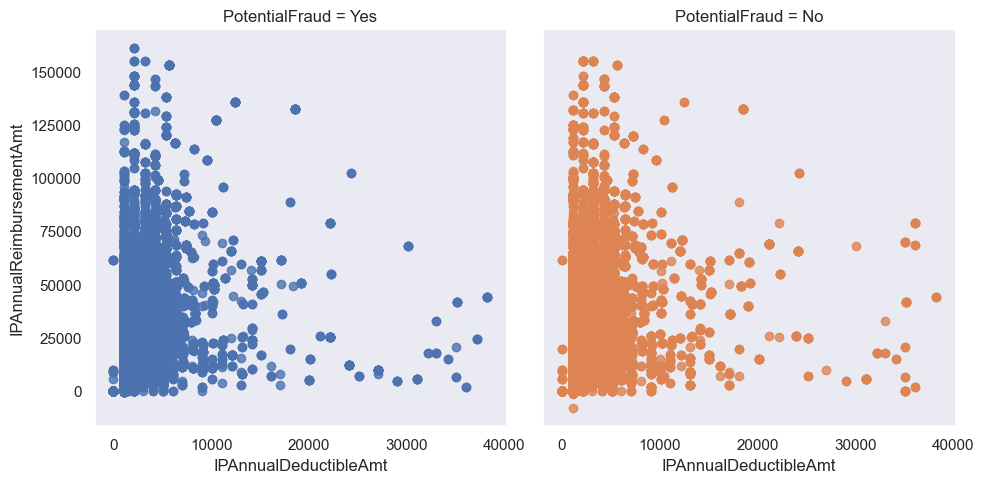

'There is no visible difference in the graph'

In [43]:
#IPAnnualReimbursementAmt vs IPAnnualDeductibleAmt
sns.set(rc={'figure.figsize':(12,8)},style='dark')
sns.lmplot(x = "IPAnnualDeductibleAmt",y = "IPAnnualReimbursementAmt",data = train_prov_with_patn_ben
           ,hue = "PotentialFraud",col = "PotentialFraud",fit_reg = False)
plt.show()
"""There is no visible difference in the graph"""

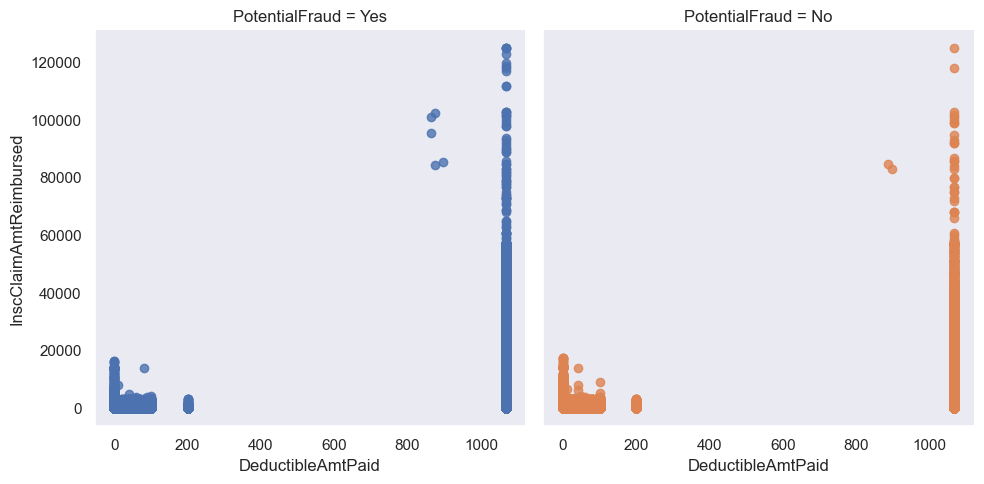

"DeductibleAmtPaid vs InscClaimAmtReimbursed for both fraud and non fraud looks like very same\nwe can't able to differentiate"

In [44]:
#DeductibleAmtPaid vs InscClaimAmtReimbursed in both fraud and non fraud
sns.lmplot(y = "InscClaimAmtReimbursed",x = "DeductibleAmtPaid",data = train_prov_with_patn_ben
           ,hue = "PotentialFraud",col = "PotentialFraud",fit_reg = False)
plt.show()
"""DeductibleAmtPaid vs InscClaimAmtReimbursed for both fraud and non fraud looks like very same
we can't able to differentiate"""

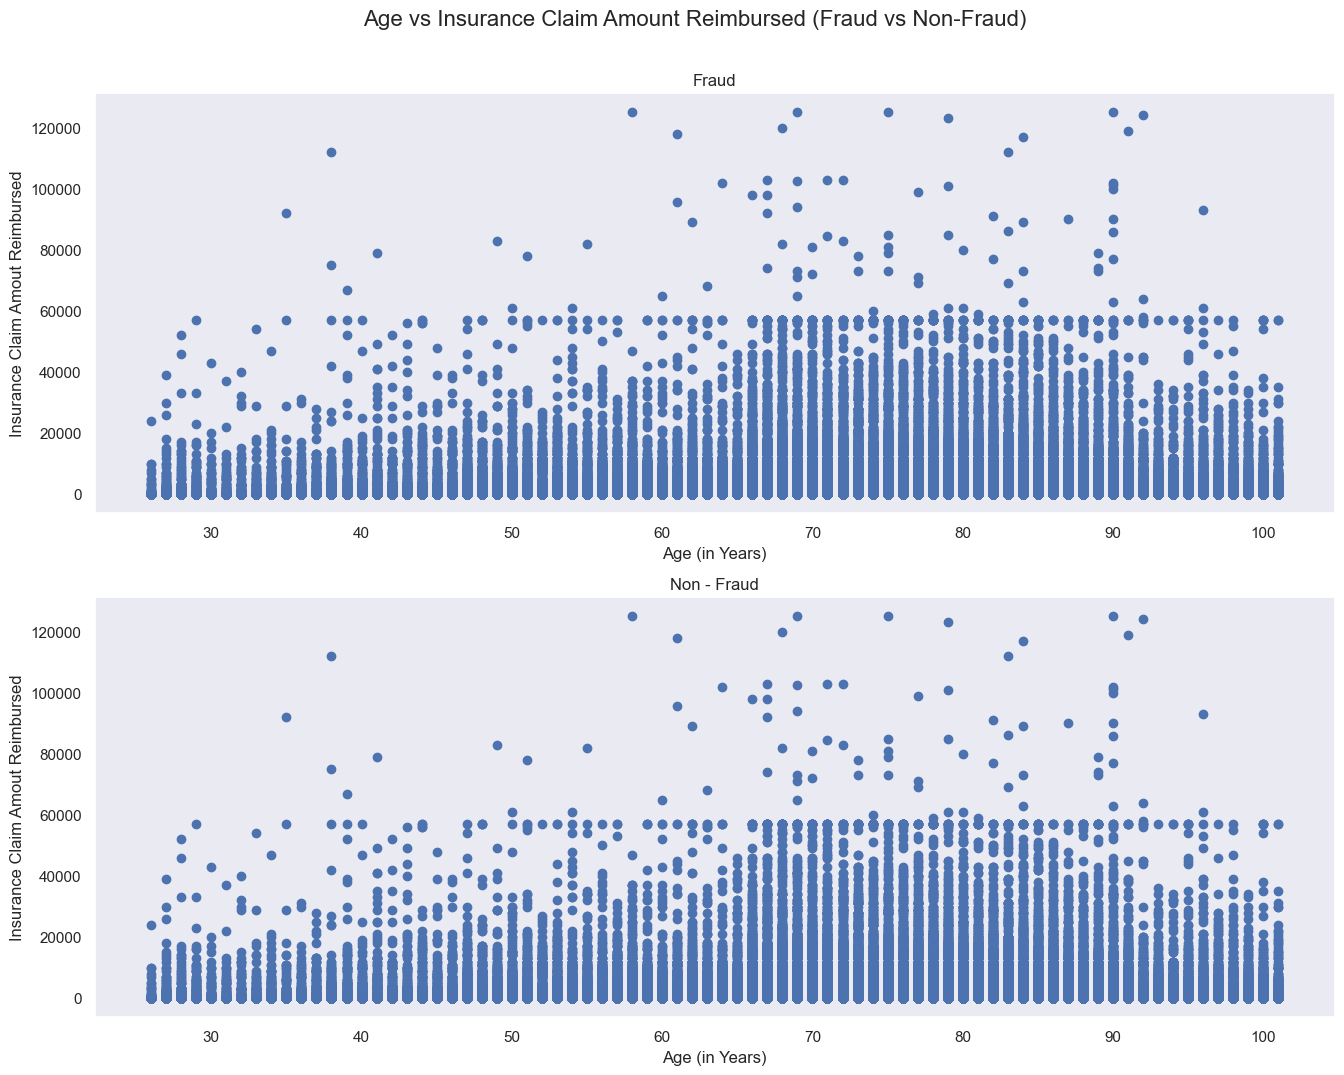

In [45]:
#lets check age vs InscClaimAmtReimbursed in both fraud and non fraud
plt.figure(figsize = (16,12))
plt.subplot(2,1,1)
x = train_prov_with_patn_ben[train_prov_with_patn_ben.PotentialFraud == "Yes"].Age
y = train_prov_with_patn_ben[train_prov_with_patn_ben.PotentialFraud == "Yes"].InscClaimAmtReimbursed
plt.scatter(x,y)
plt.title("Fraud")
plt.ylabel("Insurance Claim Amout Reimbursed")
plt.xlabel('Age (in Years)')

plt.subplot(2,1,2)
x = train_prov_with_patn_ben[train_prov_with_patn_ben.PotentialFraud == "Yes"].Age
y = train_prov_with_patn_ben[train_prov_with_patn_ben.PotentialFraud == "Yes"].InscClaimAmtReimbursed
plt.title("Non - Fraud")
plt.ylabel("Insurance Claim Amout Reimbursed")
plt.xlabel('Age (in Years)')
plt.scatter(x,y)

plt.suptitle("Age vs Insurance Claim Amount Reimbursed (Fraud vs Non-Fraud)",fontsize = 16,y=0.95)
plt.show()

### **Appending Train data to Test data will help you get good average scores of new features in Test data,as we see not all levels of variables are present in test data compared to train data.So our approach here will be-to append train data to test data ,derive new average features and take only test data to evaluate results**


In [46]:
#Before appending the train data to the test data,we are creating a copy of test_data for future use.
test_prov_with_patn_ben_copy = test_prov_with_patn_ben
print("test_prov_with_patn_ben shape:",test_prov_with_patn_ben.shape)
print("test_prov_with_patn_ben_copy:",test_prov_with_patn_ben_copy.shape)
#As the test data doesn't have a target columns because of that we are only taking the columns that exists in the train data.
cols_test = test_prov_with_patn_ben.columns
#now appending the train data to test data
test_prov_with_patn_ben = pd.concat([test_prov_with_patn_ben,train_prov_with_patn_ben[cols_test]])
print("After combining both train and test expected no of collumns in test data:",(test_prov_with_patn_ben_copy.shape[0]) + (train_prov_with_patn_ben.shape[0]))
print("Total no of columns in test data :",test_prov_with_patn_ben.shape)

test_prov_with_patn_ben shape: (135392, 57)
test_prov_with_patn_ben_copy: (135392, 57)
After combining both train and test expected no of collumns in test data: 693603
Total no of columns in test data : (693603, 57)


### Using groupby we calculate a average based on each category in the column.

***Avg features grouped by Provider***

In [47]:
#we group the entire dataset based on Provider.
# columns that we are going to calculate a average.
avg_cols = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 
           'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
           'Age', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'Admit_For_Days']

# Using for loop we are calculating a average for each category in the column
for col in avg_cols:
    train_prov_with_patn_ben[f"PerProviderAvg_{col}"] = train_prov_with_patn_ben.groupby('Provider')[col].transform('mean')
 
for col in avg_cols:
    test_prov_with_patn_ben[f"PerProviderAvg_{col}"] = test_prov_with_patn_ben.groupby('Provider')[col].transform('mean')

#As we know we are created a new column 10 columns that are the averages of the aldready existing columns.
#so the new columns are getting added at the end of the dataset.
print("Test:",test_prov_with_patn_ben.shape)
print(test_prov_with_patn_ben.iloc[:,-10:].head(2))
print("Train:",train_prov_with_patn_ben.shape)
print(train_prov_with_patn_ben.iloc[:,-10:].head(2))

Test: (693603, 67)
   PerProviderAvg_InscClaimAmtReimbursed  PerProviderAvg_DeductibleAmtPaid  \
0                             316.081946                          2.176697   
1                             277.601958                          3.409462   

   PerProviderAvg_IPAnnualReimbursementAmt  \
0                              5479.423816   
1                              4812.903752   

   PerProviderAvg_IPAnnualDeductibleAmt  \
0                            574.094750   
1                            499.660685   

   PerProviderAvg_OPAnnualReimbursementAmt  \
0                              2227.234315   
1                              2595.872757   

   PerProviderAvg_OPAnnualDeductibleAmt  PerProviderAvg_Age  \
0                            663.649168           75.120359   
1                            798.786297           74.998369   

   PerProviderAvg_NoOfMonths_PartACov  PerProviderAvg_NoOfMonths_PartBCov  \
0                           11.923175                           11.9154

***Avg features grouped by BeneID***

In [48]:
#we group the entire dataset based on BeneID.
# columns that we are going to calculate a average.
avg_cols = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 
                'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
                'Admit_For_Days']

# Create all per-beneficiary features for train
for col in avg_cols:
    train_prov_with_patn_ben[f"PerBeneIDAvg_{col}"] = train_prov_with_patn_ben.groupby('BeneID')[col].transform('mean')

# Create all per-beneficiary features for test  
for col in avg_cols:
    test_prov_with_patn_ben[f"PerBeneIDAvg_{col}"] = test_prov_with_patn_ben.groupby('BeneID')[col].transform('mean')

***Avg features grouped by other physician***

In [49]:
# we group the entire dataset based on other physician

# Create all per-other-physician features for train
for col in avg_cols:
    train_prov_with_patn_ben[f"PerOtherPhysicianAvg_{col}"] = train_prov_with_patn_ben.groupby('OtherPhysician')[col].transform('mean')

# Create all per-other-physician features for test  
for col in avg_cols:
    test_prov_with_patn_ben[f"PerOtherPhysicianAvg_{col}"] = test_prov_with_patn_ben.groupby('OtherPhysician')[col].transform('mean')

***Avg features grouped by operating physician***

In [50]:
# dataset groped based on operating physician

# Create all per-operating-physician features for train
for col in avg_cols:
    train_prov_with_patn_ben[f"PerOperatingPhysicianAvg_{col}"] = train_prov_with_patn_ben.groupby('OperatingPhysician')[col].transform('mean')

# Create all per-operating-physician features for test  
for col in avg_cols:
    test_prov_with_patn_ben[f"PerOperatingPhysicianAvg_{col}"] = test_prov_with_patn_ben.groupby('OperatingPhysician')[col].transform('mean')

***Avg features grouped by attending physician***

In [51]:
#Grouping based on attending physician

# Create all per-attending-physician features for train
for col in avg_cols:
    train_prov_with_patn_ben[f"PerAttendingPhysicianAvg_{col}"] = train_prov_with_patn_ben.groupby('AttendingPhysician')[col].transform('mean')

# Create all per-attending-physician features for test  
for col in avg_cols:
    test_prov_with_patn_ben[f"PerAttendingPhysicianAvg_{col}"] = test_prov_with_patn_ben.groupby('AttendingPhysician')[col].transform('mean')

***Avg features grouped by diagnosis group code***

In [52]:
#grouping based on diagnosis group code

# Create all per-diagnosis-group-code features for train
for col in avg_cols:
    train_prov_with_patn_ben[f"PerDiagnosisGroupCodeAvg_{col}"] = train_prov_with_patn_ben.groupby('DiagnosisGroupCode')[col].transform('mean')

# Create all per-diagnosis-group-code features for test  
for col in avg_cols:
    test_prov_with_patn_ben[f"PerDiagnosisGroupCodeAvg_{col}"] = test_prov_with_patn_ben.groupby('DiagnosisGroupCode')[col].transform('mean')

# Verify diagnosis group code features were created
diagnosis_features = [col for col in train_prov_with_patn_ben.columns if col.startswith('PerDiagnosisGroupCodeAvg_')]
print(f"Created {len(diagnosis_features)} per-diagnosis-group-code average features")

Created 7 per-diagnosis-group-code average features


***Avg features grouped by admit diagnosis code***

In [53]:
#grouping based on admit diagnosis code

# Create all per-claim-admit-diagnosis-code features for train
for col in avg_cols:
    train_prov_with_patn_ben[f"PerClmAdmitDiagnosisCodeAvg_{col}"] = train_prov_with_patn_ben.groupby('ClmAdmitDiagnosisCode')[col].transform('mean')

# Create all per-claim-admit-diagnosis-code features for test  
for col in avg_cols:
    test_prov_with_patn_ben[f"PerClmAdmitDiagnosisCodeAvg_{col}"] = test_prov_with_patn_ben.groupby('ClmAdmitDiagnosisCode')[col].transform('mean')

# Verify claim admit diagnosis code features were created
clm_admit_features = [col for col in train_prov_with_patn_ben.columns if col.startswith('PerClmAdmitDiagnosisCodeAvg_')]
print(f"Created {len(clm_admit_features)} per-claim-admit-diagnosis-code average features")

Created 7 per-claim-admit-diagnosis-code average features


***Avg features grouped by claim procedure code 1***

In [54]:
### grouped based on per claim procedure code 1

# Create all per-claim-procedure-code-1 features for train
for col in avg_cols:
    train_prov_with_patn_ben[f"PerClmProcedureCode_1Avg_{col}"] = train_prov_with_patn_ben.groupby('ClmProcedureCode_1')[col].transform('mean')

# Create all per-claim-procedure-code-1 features for test  
for col in avg_cols:
    test_prov_with_patn_ben[f"PerClmProcedureCode_1Avg_{col}"] = test_prov_with_patn_ben.groupby('ClmProcedureCode_1')[col].transform('mean')

# Verify claim procedure code 1 features were created
procedure_1_features = [col for col in train_prov_with_patn_ben.columns if col.startswith('PerClmProcedureCode_1Avg_')]
print(f"Created {len(procedure_1_features)} per-claim-procedure-code-1 average features")

Created 7 per-claim-procedure-code-1 average features


***Avg features grouped by diagnosis group code 2***

In [55]:
### grouped based on claim procedure code 2

# Create all per-claim-procedure-code-2 features for train
for col in avg_cols:
    train_prov_with_patn_ben[f"PerClmProcedureCode_2Avg_{col}"] = train_prov_with_patn_ben.groupby('ClmProcedureCode_2')[col].transform('mean')

# Create all per-claim-procedure-code-2 features for test
for col in avg_cols:
    test_prov_with_patn_ben[f"PerClmProcedureCode_2Avg_{col}"] = test_prov_with_patn_ben.groupby('ClmProcedureCode_2')[col].transform('mean')

# Verify claim procedure code 2 features were created
procedure_2_features = [col for col in train_prov_with_patn_ben.columns if col.startswith('PerClmProcedureCode_2Avg_')]
print(f"Created {len(procedure_2_features)} per-claim-procedure-code-2 average features")


Created 7 per-claim-procedure-code-2 average features


***Avg features grouped by diagnosis group code 3***

In [56]:
### grouped based on claim procedure code 3

# Create all per-claim-procedure-code-3 features for train
for col in avg_cols:
    train_prov_with_patn_ben[f"PerClmProcedureCode_3Avg_{col}"] = (
        train_prov_with_patn_ben.groupby('ClmProcedureCode_3')[col].transform('mean')
    )

# Create all per-claim-procedure-code-3 features for test
for col in avg_cols:
    test_prov_with_patn_ben[f"PerClmProcedureCode_3Avg_{col}"] = (
        test_prov_with_patn_ben.groupby('ClmProcedureCode_3')[col].transform('mean')
    )

# Verify claim procedure code 3 features were created
procedure_3_features = [col for col in train_prov_with_patn_ben.columns 
                        if col.startswith('PerClmProcedureCode_3Avg_')]
print(f"Created {len(procedure_3_features)} per-claim-procedure-code-3 average features")


Created 7 per-claim-procedure-code-3 average features


***Avg features grouped by claim diagnosis code 1***

In [57]:
### grouped based on claim diagnosis code 1

# Create all per-claim-diagnosis-code-1 features for train
for col in avg_cols:
    train_prov_with_patn_ben[f"PerClmDiagnosisCode_1Avg_{col}"] = (
        train_prov_with_patn_ben.groupby('ClmDiagnosisCode_1')[col].transform('mean')
    )

# Create all per-claim-diagnosis-code-1 features for test
for col in avg_cols:
    test_prov_with_patn_ben[f"PerClmDiagnosisCode_1Avg_{col}"] = (
        test_prov_with_patn_ben.groupby('ClmDiagnosisCode_1')[col].transform('mean')
    )

# Verify claim diagnosis code 1 features were created
diagnosis_1_features = [col for col in train_prov_with_patn_ben.columns 
                        if col.startswith('PerClmDiagnosisCode_1Avg_')]
print(f"Created {len(diagnosis_1_features)} per-claim-diagnosis-code-1 average features")


Created 7 per-claim-diagnosis-code-1 average features


***Average features grouped by ClmDiagnosisCode_2***

In [58]:
### Average features grouped by ClmDiagnosisCode_2

# Create all per-claim-diagnosis-code-2 features for train
for col in avg_cols:
    train_prov_with_patn_ben[f"PerClmDiagnosisCode_2Avg_{col}"] = (
        train_prov_with_patn_ben.groupby('ClmDiagnosisCode_2')[col].transform('mean')
    )

# Create all per-claim-diagnosis-code-2 features for test  
for col in avg_cols:
    test_prov_with_patn_ben[f"PerClmDiagnosisCode_2Avg_{col}"] = (
        test_prov_with_patn_ben.groupby('ClmDiagnosisCode_2')[col].transform('mean')
    )

# Verify claim diagnosis code 2 features were created
diagnosis_2_features = [col for col in train_prov_with_patn_ben.columns 
                       if col.startswith('PerClmDiagnosisCode_2Avg_')]
print(f"Created {len(diagnosis_2_features)} per-claim-diagnosis-code-2 average features")


Created 7 per-claim-diagnosis-code-2 average features


***Average features grouped by ClmDiagnosisCode_3 and ClmDiagnosisCode_4***

In [59]:
# Average features grouped by ClmDiagnosisCode_3

# Using predefined avg_cols list
for col in avg_cols:
    train_prov_with_patn_ben[f'ClmDiagnosisCode_3_{col}_avg'] = (
        train_prov_with_patn_ben.groupby('ClmDiagnosisCode_3')[col].transform('mean')
    )

for col in avg_cols:
    test_prov_with_patn_ben[f'ClmDiagnosisCode_3_{col}_avg'] = (
        test_prov_with_patn_ben.groupby('ClmDiagnosisCode_3')[col].transform('mean')
    )

# Verify claim diagnosis code 3 features were created
diagnosis_3_features = [
    col for col in train_prov_with_patn_ben.columns
    if col.startswith('ClmDiagnosisCode_3') and col.endswith('_avg')
]
print('Created', len(diagnosis_3_features), 'per-claim-diagnosis-code-3 average features')


# Average features grouped by ClmDiagnosisCode_4
# Using predefined avg_cols list
for col in avg_cols:
    train_prov_with_patn_ben[f'ClmDiagnosisCode_4_{col}_avg'] = (
        train_prov_with_patn_ben.groupby('ClmDiagnosisCode_4')[col].transform('mean')
    )

for col in avg_cols:
    test_prov_with_patn_ben[f'ClmDiagnosisCode_4_{col}_avg'] = (
        test_prov_with_patn_ben.groupby('ClmDiagnosisCode_4')[col].transform('mean')
    )

# Verify claim diagnosis code 4 features were created
diagnosis_4_features = [
    col for col in train_prov_with_patn_ben.columns
    if col.startswith('ClmDiagnosisCode_4') and col.endswith('_avg')
]
print('Created', len(diagnosis_4_features), 'per-claim-diagnosis-code-4 average features')

Created 7 per-claim-diagnosis-code-3 average features
Created 7 per-claim-diagnosis-code-4 average features


***Claims are filed by Provider,so fraud can be organized crime.So we will check ClmCounts filed by Providers and when pairs like Provider +BeneID, Provider+Attending Physician, Provider+ClmAdmitDiagnosisCode, Provider+ClmProcedureCode_1,Provider+ClmDiagnosisCode_1 are together.
Average Feature based on grouping based on combinations of different variables.***

In [60]:
### Grouping based on different combinations and make count of them based on claim ID for both train and test data.

# 1) Define your partner cols & explicit combos (same as before)
two_way_feats = [
    'BeneID', 'AttendingPhysician', 'OtherPhysician', 'OperatingPhysician',
    'ClmAdmitDiagnosisCode',
    'ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3',
    'ClmProcedureCode_4','ClmProcedureCode_5',
    'ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3',
    'ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6',
    'ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9',
    'DiagnosisGroupCode'
]

three_way_feats = [
    ['BeneID','AttendingPhysician'],
    ['BeneID','OtherPhysician'],
    ['BeneID','OperatingPhysician'],
    ['BeneID','ClmProcedureCode_1'],
    ['BeneID','ClmDiagnosisCode_1']
]

four_way_feats = [
    ['BeneID','AttendingPhysician','ClmProcedureCode_1'],
    ['BeneID','AttendingPhysician','ClmDiagnosisCode_1'],
    ['BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1']
]

# 2) Build your full list of group‐by key‐lists
groupings = []
groupings.append(['Provider'])                                   # 1‐way
groupings += [['Provider', c] for c in two_way_feats]             # 2‐way
groupings += [['Provider'] + combo for combo in three_way_feats]  # 3‐way
groupings += [['Provider'] + combo for combo in four_way_feats]   # 4‐way

# 3) Loop once to add all ClmCount_… features into both train & test
for grp in groupings:
    col_name = 'ClmCount_' + '_'.join(grp)
    train_prov_with_patn_ben[col_name] = (
        train_prov_with_patn_ben.groupby(grp)['ClaimID']
                               .transform('count')
    )
    test_prov_with_patn_ben[col_name] = (
        test_prov_with_patn_ben.groupby(grp)['ClaimID']
                               .transform('count')
    )

print(f" Created {len(groupings)} ClmCount_… features on train & test")

 Created 29 ClmCount_… features on train & test


In [61]:
#checking the shape of both train and test data
print("train_prov_with_patn_ben shape :",train_prov_with_patn_ben.shape)
print("test_prov_with_patn_ben shape :",test_prov_with_patn_ben.shape)

train_prov_with_patn_ben shape : (558211, 188)
test_prov_with_patn_ben shape : (693603, 187)


In [62]:
#Lets check the unique values in the diagnosis code 1 column
# we are forcing converting the each values in the column into str type because if it is a Nan or othe values exits it throughs an error.
diagnosis_code1 = train_prov_with_patn_ben["ClmDiagnosisCode_1"].astype(str).str[0:2]
print(diagnosis_code1.unique())

['79' '71' '64' '36' '29' '31' '42' '11' '72' '99' '39' '70' '78' '44'
 'na' '40' '30' 'V8' 'V7' '35' '53' '28' '47' '27' 'V5' '41' 'V6' '82'
 'V1' '58' '55' '34' '81' '06' '24' '89' '48' '57' '96' '46' '91' '38'
 '23' '15' 'V4' '83' '43' 'V0' '49' '56' '59' '33' '73' '21' '85' '17'
 '68' '25' '80' '84' '92' '19' '62' '16' '20' '87' '45' '32' '60' '61'
 '07' '03' 'V2' '26' '51' '18' '88' '69' '22' '37' '95' '52' '90' '75'
 '02' '97' '05' '50' '74' '00' '93' '04' '09' '14' '12' '13' '98' '54'
 '08' 'E8' '86' '94' 'E9' '65' '63' '01' '10' '66' '67' '76' '77']


### Data Preprocessing

In [63]:
#Filling a Numeric column null values with 0
col_num = train_prov_with_patn_ben.select_dtypes([np.number]).columns #np.number is a alias for all numerical datatypes.
train_prov_with_patn_ben[col_num] = train_prov_with_patn_ben[col_num].fillna(0)
test_prov_with_patn_ben[col_num] = test_prov_with_patn_ben[col_num].fillna(0)

***Feature Selection***

In [64]:
#As we extracted all informations as numerical values now we are going to drop the original columns from the data.
#we do this because we extracted all the usefull informations from this original column that column is become useless now.
cols = train_prov_with_patn_ben.columns
cols[0:58]

remove_these_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'ClmAdmitDiagnosisCode', 'AdmissionDt',
       'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD',
        'State', 'County']

train_category_removed=train_prov_with_patn_ben.drop(axis=1,columns=remove_these_columns)
test_category_removed=test_prov_with_patn_ben.drop(axis=1,columns=remove_these_columns)
print("train shape:",train_category_removed.shape)
print("test shape:",test_category_removed.shape)
print("train null values:",train_category_removed.isnull().sum().sum())
print("test null values:",test_category_removed.isnull().sum().sum())

train shape: (558211, 157)
test shape: (693603, 156)
train null values: 0
test null values: 0


***One Hot Encoding***

In [65]:
#for features race and gender we are going to done a one hot encoding.
#Type conversion
train_category_removed["Gender"] = train_category_removed["Gender"].astype("category")
test_category_removed["Gender"] = test_category_removed["Gender"].astype("category")
train_category_removed["Race"] = train_category_removed["Race"].astype("category")
test_category_removed["Race"] = test_category_removed["Race"].astype("category")

#Dummification
train_category_removed = pd.get_dummies(train_category_removed,columns = ["Gender","Race"],drop_first = True)
test_category_removed = pd.get_dummies(test_category_removed,columns = ["Gender","Race"],drop_first = True)

#checking the columns
train_category_removed.head().T #T denotes transpose


,0,1,2,3,4
Provider,PRV57172,PRV57172,PRV55158,PRV54966,PRV54890
InscClaimAmtReimbursed,50,70,70,70,90
DeductibleAmtPaid,0.0,0.0,0.0,0.0,0.0
Admit_For_Days,0.0,0.0,0.0,0.0,0.0
RenalDiseaseIndicator,0,0,0,0,0
...,...,...,...,...,...
ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,0.0,0.0,0.0,0.0,0.0
Gender_2,False,False,False,False,False
Race_2,False,False,False,False,False
Race_3,False,False,False,False,False


In [66]:
test_category_removed.iloc[135391:135393]

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Admit_For_Days,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_Admit_For_Days,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_Admit_For_Days,PerOtherPhysicianAvg_InscClaimAmtReimbursed,PerOtherPhysicianAvg_DeductibleAmtPaid,PerOtherPhysicianAvg_IPAnnualReimbursementAmt,PerOtherPhysicianAvg_IPAnnualDeductibleAmt,PerOtherPhysicianAvg_OPAnnualReimbursementAmt,PerOtherPhysicianAvg_OPAnnualDeductibleAmt,PerOtherPhysicianAvg_Admit_For_Days,PerOperatingPhysicianAvg_InscClaimAmtReimbursed,PerOperatingPhysicianAvg_DeductibleAmtPaid,PerOperatingPhysicianAvg_IPAnnualReimbursementAmt,PerOperatingPhysicianAvg_IPAnnualDeductibleAmt,PerOperatingPhysicianAvg_OPAnnualReimbursementAmt,PerOperatingPhysicianAvg_OPAnnualDeductibleAmt,PerOperatingPhysicianAvg_Admit_For_Days,PerAttendingPhysicianAvg_InscClaimAmtReimbursed,PerAttendingPhysicianAvg_DeductibleAmtPaid,PerAttendingPhysicianAvg_IPAnnualReimbursementAmt,PerAttendingPhysicianAvg_IPAnnualDeductibleAmt,PerAttendingPhysicianAvg_OPAnnualReimbursementAmt,PerAttendingPhysicianAvg_OPAnnualDeductibleAmt,PerAttendingPhysicianAvg_Admit_For_Days,PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed,PerDiagnosisGroupCodeAvg_DeductibleAmtPaid,PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_Admit_For_Days,PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid,PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_Admit_For_Days,PerClmProcedureCode_1Avg_InscClaimAmtReimbursed,PerClmProcedureCode_1Avg_DeductibleAmtPaid,PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_Admit_For_Days,PerClmProcedureCode_2Avg_InscClaimAmtReimbursed,PerClmProcedureCode_2Avg_DeductibleAmtPaid,PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_2Avg_Admit_For_Days,PerClmProcedureCode_3Avg_InscClaimAmtReimbursed,PerClmProcedureCode_3Avg_DeductibleAmtPaid,PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_3Avg_Admit_For_Days,PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_1Avg_DeductibleAmtPaid,PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_Admit_For

***Converting Target values Yes->0 & No->1***

In [67]:
#using map function
train_category_removed["PotentialFraud"] = train_category_removed["PotentialFraud"].map({"Yes":1,"No":0}).astype('int64')
print(train_category_removed.dtypes)
print("train_category_removed potential fraud min value:",train_category_removed["PotentialFraud"].min())
print("train_category_removed potential fraud min value:",train_category_removed["PotentialFraud"].max())
train_category_removed.head()

Provider                                                           object
InscClaimAmtReimbursed                                              int64
DeductibleAmtPaid                                                 float64
Admit_For_Days                                                    float64
RenalDiseaseIndicator                                              object
                                                                   ...   
ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1    float64
Gender_2                                                             bool
Race_2                                                               bool
Race_3                                                               bool
Race_5                                                               bool
Length: 159, dtype: object
train_category_removed potential fraud min value: 0
train_category_removed potential fraud min value: 1


,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Admit_For_Days,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PotentialFraud,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_Admit_For_Days,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_Admit_For_Days,PerOtherPhysicianAvg_InscClaimAmtReimbursed,PerOtherPhysicianAvg_DeductibleAmtPaid,PerOtherPhysicianAvg_IPAnnualReimbursementAmt,PerOtherPhysicianAvg_IPAnnualDeductibleAmt,PerOtherPhysicianAvg_OPAnnualReimbursementAmt,PerOtherPhysicianAvg_OPAnnualDeductibleAmt,PerOtherPhysicianAvg_Admit_For_Days,PerOperatingPhysicianAvg_InscClaimAmtReimbursed,PerOperatingPhysicianAvg_DeductibleAmtPaid,PerOperatingPhysicianAvg_IPAnnualReimbursementAmt,PerOperatingPhysicianAvg_IPAnnualDeductibleAmt,PerOperatingPhysicianAvg_OPAnnualReimbursementAmt,PerOperatingPhysicianAvg_OPAnnualDeductibleAmt,PerOperatingPhysicianAvg_Admit_For_Days,PerAttendingPhysicianAvg_InscClaimAmtReimbursed,PerAttendingPhysicianAvg_DeductibleAmtPaid,PerAttendingPhysicianAvg_IPAnnualReimbursementAmt,PerAttendingPhysicianAvg_IPAnnualDeductibleAmt,PerAttendingPhysicianAvg_OPAnnualReimbursementAmt,PerAttendingPhysicianAvg_OPAnnualDeductibleAmt,PerAttendingPhysicianAvg_Admit_For_Days,PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed,PerDiagnosisGroupCodeAvg_DeductibleAmtPaid,PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_Admit_For_Days,PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid,PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_Admit_For_Days,PerClmProcedureCode_1Avg_InscClaimAmtReimbursed,PerClmProcedureCode_1Avg_DeductibleAmtPaid,PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_Admit_For_Days,PerClmProcedureCode_2Avg_InscClaimAmtReimbursed,PerClmProcedureCode_2Avg_DeductibleAmtPaid,PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_2Avg_Admit_For_Days,PerClmProcedureCode_3Avg_InscClaimAmtReimbursed,PerClmProcedureCode_3Avg_DeductibleAmtPaid,PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_3Avg_Admit_For_Days,PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_1Avg_DeductibleAmtPaid,PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode

***Now we are removing the appended train data from the test data***

In [68]:
print("shape of test data before removing appended train data :",test_category_removed.shape)
#updating test data by removing appended train data.
test_category_removed = test_category_removed.iloc[:135392]
print("shape of test data after removed appended train data :",test_category_removed.shape)
#checking the last values to confirm that the appended train data has been removed.
test_category_removed.head()

shape of test data before removing appended train data : (693603, 158)
shape of test data after removed appended train data : (135392, 158)


,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Admit_For_Days,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_Admit_For_Days,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_Admit_For_Days,PerOtherPhysicianAvg_InscClaimAmtReimbursed,PerOtherPhysicianAvg_DeductibleAmtPaid,PerOtherPhysicianAvg_IPAnnualReimbursementAmt,PerOtherPhysicianAvg_IPAnnualDeductibleAmt,PerOtherPhysicianAvg_OPAnnualReimbursementAmt,PerOtherPhysicianAvg_OPAnnualDeductibleAmt,PerOtherPhysicianAvg_Admit_For_Days,PerOperatingPhysicianAvg_InscClaimAmtReimbursed,PerOperatingPhysicianAvg_DeductibleAmtPaid,PerOperatingPhysicianAvg_IPAnnualReimbursementAmt,PerOperatingPhysicianAvg_IPAnnualDeductibleAmt,PerOperatingPhysicianAvg_OPAnnualReimbursementAmt,PerOperatingPhysicianAvg_OPAnnualDeductibleAmt,PerOperatingPhysicianAvg_Admit_For_Days,PerAttendingPhysicianAvg_InscClaimAmtReimbursed,PerAttendingPhysicianAvg_DeductibleAmtPaid,PerAttendingPhysicianAvg_IPAnnualReimbursementAmt,PerAttendingPhysicianAvg_IPAnnualDeductibleAmt,PerAttendingPhysicianAvg_OPAnnualReimbursementAmt,PerAttendingPhysicianAvg_OPAnnualDeductibleAmt,PerAttendingPhysicianAvg_Admit_For_Days,PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed,PerDiagnosisGroupCodeAvg_DeductibleAmtPaid,PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_Admit_For_Days,PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid,PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_Admit_For_Days,PerClmProcedureCode_1Avg_InscClaimAmtReimbursed,PerClmProcedureCode_1Avg_DeductibleAmtPaid,PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_Admit_For_Days,PerClmProcedureCode_2Avg_InscClaimAmtReimbursed,PerClmProcedureCode_2Avg_DeductibleAmtPaid,PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_2Avg_Admit_For_Days,PerClmProcedureCode_3Avg_InscClaimAmtReimbursed,PerClmProcedureCode_3Avg_DeductibleAmtPaid,PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_3Avg_Admit_For_Days,PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_1Avg_DeductibleAmtPaid,PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_Admit_For

In [69]:
test_category_removed.tail()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Admit_For_Days,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_Admit_For_Days,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_Admit_For_Days,PerOtherPhysicianAvg_InscClaimAmtReimbursed,PerOtherPhysicianAvg_DeductibleAmtPaid,PerOtherPhysicianAvg_IPAnnualReimbursementAmt,PerOtherPhysicianAvg_IPAnnualDeductibleAmt,PerOtherPhysicianAvg_OPAnnualReimbursementAmt,PerOtherPhysicianAvg_OPAnnualDeductibleAmt,PerOtherPhysicianAvg_Admit_For_Days,PerOperatingPhysicianAvg_InscClaimAmtReimbursed,PerOperatingPhysicianAvg_DeductibleAmtPaid,PerOperatingPhysicianAvg_IPAnnualReimbursementAmt,PerOperatingPhysicianAvg_IPAnnualDeductibleAmt,PerOperatingPhysicianAvg_OPAnnualReimbursementAmt,PerOperatingPhysicianAvg_OPAnnualDeductibleAmt,PerOperatingPhysicianAvg_Admit_For_Days,PerAttendingPhysicianAvg_InscClaimAmtReimbursed,PerAttendingPhysicianAvg_DeductibleAmtPaid,PerAttendingPhysicianAvg_IPAnnualReimbursementAmt,PerAttendingPhysicianAvg_IPAnnualDeductibleAmt,PerAttendingPhysicianAvg_OPAnnualReimbursementAmt,PerAttendingPhysicianAvg_OPAnnualDeductibleAmt,PerAttendingPhysicianAvg_Admit_For_Days,PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed,PerDiagnosisGroupCodeAvg_DeductibleAmtPaid,PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_Admit_For_Days,PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid,PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_Admit_For_Days,PerClmProcedureCode_1Avg_InscClaimAmtReimbursed,PerClmProcedureCode_1Avg_DeductibleAmtPaid,PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_Admit_For_Days,PerClmProcedureCode_2Avg_InscClaimAmtReimbursed,PerClmProcedureCode_2Avg_DeductibleAmtPaid,PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_2Avg_Admit_For_Days,PerClmProcedureCode_3Avg_InscClaimAmtReimbursed,PerClmProcedureCode_3Avg_DeductibleAmtPaid,PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_3Avg_Admit_For_Days,PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_1Avg_DeductibleAmtPaid,PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_Admit_For

***Aggregation to the prviders level***

In [70]:
pd.set_option("display.max.rows",None)
print(train_category_removed.dtypes)


Provider                                                           object
InscClaimAmtReimbursed                                              int64
DeductibleAmtPaid                                                 float64
Admit_For_Days                                                    float64
RenalDiseaseIndicator                                              object
NoOfMonths_PartACov                                                 int64
NoOfMonths_PartBCov                                                 int64
ChronicCond_Alzheimer                                               int64
ChronicCond_Heartfailure                                            int64
ChronicCond_KidneyDisease                                           int64
ChronicCond_Cancer                                                  int64
ChronicCond_ObstrPulmonary                                          int64
ChronicCond_Depression                                              int64
ChronicCond_Diabetes                  

In [71]:
#lets aggregate based on the provider and potentialfraud for train data & provider for test.
#it includes all features except reneldiseaseindicator because it contains string value. 
train_category_removed_groupedby_prov = train_category_removed.groupby(["Provider","PotentialFraud"],as_index = False).sum(numeric_only = True)
test_category_removed_groupedby_prov = test_category_removed.groupby(["Provider"],as_index = False).sum(numeric_only = True)


In [72]:
test_category_removed_groupedby_prov.head(2)

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Admit_For_Days,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_Admit_For_Days,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_Admit_For_Days,PerOtherPhysicianAvg_InscClaimAmtReimbursed,PerOtherPhysicianAvg_DeductibleAmtPaid,PerOtherPhysicianAvg_IPAnnualReimbursementAmt,PerOtherPhysicianAvg_IPAnnualDeductibleAmt,PerOtherPhysicianAvg_OPAnnualReimbursementAmt,PerOtherPhysicianAvg_OPAnnualDeductibleAmt,PerOtherPhysicianAvg_Admit_For_Days,PerOperatingPhysicianAvg_InscClaimAmtReimbursed,PerOperatingPhysicianAvg_DeductibleAmtPaid,PerOperatingPhysicianAvg_IPAnnualReimbursementAmt,PerOperatingPhysicianAvg_IPAnnualDeductibleAmt,PerOperatingPhysicianAvg_OPAnnualReimbursementAmt,PerOperatingPhysicianAvg_OPAnnualDeductibleAmt,PerOperatingPhysicianAvg_Admit_For_Days,PerAttendingPhysicianAvg_InscClaimAmtReimbursed,PerAttendingPhysicianAvg_DeductibleAmtPaid,PerAttendingPhysicianAvg_IPAnnualReimbursementAmt,PerAttendingPhysicianAvg_IPAnnualDeductibleAmt,PerAttendingPhysicianAvg_OPAnnualReimbursementAmt,PerAttendingPhysicianAvg_OPAnnualDeductibleAmt,PerAttendingPhysicianAvg_Admit_For_Days,PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed,PerDiagnosisGroupCodeAvg_DeductibleAmtPaid,PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_Admit_For_Days,PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid,PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_Admit_For_Days,PerClmProcedureCode_1Avg_InscClaimAmtReimbursed,PerClmProcedureCode_1Avg_DeductibleAmtPaid,PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_Admit_For_Days,PerClmProcedureCode_2Avg_InscClaimAmtReimbursed,PerClmProcedureCode_2Avg_DeductibleAmtPaid,PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_2Avg_Admit_For_Days,PerClmProcedureCode_3Avg_InscClaimAmtReimbursed,PerClmProcedureCode_3Avg_DeductibleAmtPaid,PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_3Avg_Admit_For_Days,PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_1Avg_DeductibleAmtPaid,PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_Admit_For_Days,PerClmDiagnosisC

In [73]:
print("Providers in train:",train_category_removed_groupedby_prov.shape)
print("Providers in test:",test_category_removed_groupedby_prov.shape)

Providers in train: (5410, 158)
Providers in test: (1353, 157)


In [74]:
#seperate x & y data
x = train_category_removed_groupedby_prov.drop(["Provider","PotentialFraud"],axis = 1)
y = train_category_removed_groupedby_prov["PotentialFraud"]

***Feature Scaling***

In [75]:
#standardizing a "x" data.
sc = StandardScaler()
sc.fit(x)
x_std = sc.transform(x)

x_test_std = sc.transform(test_category_removed_groupedby_prov.iloc[:,1:])
print(x_test_std[:3,:])
print(x_std[:3,:])

[[-1.82660498e-01 -3.08902064e-01 -3.11907867e-01  3.66763857e-01
   3.77351485e-01  3.44042281e-01  2.96684217e-01  2.67990182e-01
   2.25725844e-01  3.82290560e-01  3.92472932e-01  3.88768183e-01
   3.54058451e-01  3.28751688e-01  2.59119095e-01  3.13019839e-01
   3.99759783e-01  3.73634627e-01  3.87544025e-01  3.96927069e-01
   3.57899551e-01  9.66366623e-01 -1.82660498e-01 -3.08872779e-01
   3.99759783e-01  3.73634627e-01  3.87544025e-01  3.96927069e-01
   3.57899551e-01  3.66763857e-01  3.77351485e-01 -2.48130758e-01
   2.80270301e-01  2.02679931e-01  3.99759783e-01  3.73634627e-01
   3.87544025e-01  3.96927069e-01  4.26990827e-01  4.74289582e-02
  -2.46591438e-01  5.66224227e-01  6.75100702e-01  4.40252077e-01
   4.00494615e-01 -1.40926893e-01 -2.69781419e-01 -2.56456693e-01
  -2.89027320e-02  5.20407753e-02  6.87745843e-02  1.22760081e-01
  -2.73059911e-01 -1.34510270e-01 -2.27842922e-01  4.20029801e-01
   4.16952339e-01  3.78264651e-01  3.93169168e-01 -6.88493079e-02
  -3.14739

In [76]:
print("X shape :",x_std.shape)

X shape : (5410, 156)


***Lets split the train and test data***

In [77]:
x_train,x_val,y_train,y_val = train_test_split(x_std,y,test_size = 0.3,random_state = 42,stratify = y,shuffle = True)
print("x train shape:",x_train.shape)
print("x val shape:",x_val.shape)
print("x train shape:",y_train.shape)
print("y val shape:",y_val.shape)

x train shape: (3787, 156)
x val shape: (1623, 156)
x train shape: (3787,)
y val shape: (1623,)


### ***Model Building***
***Logistic Regression***

In [78]:
#logisticregressioncv for choosing a best regularization parameter c.
from sklearn.linear_model import LogisticRegressionCV
log_mod = LogisticRegressionCV(cv = 10,class_weight = "balanced",random_state = 42)
"""class_weight = "balanced" is for giving balanced weightage for all the clases even if the one class is count wise
very lower than the another class."""
log_mod.fit(x_train,y_train)

LogisticRegressionCV(class_weight='balanced', cv=10, random_state=42)

In [79]:
#Lets predict the probability of 0 and 1 for both x_train and y_train.To check the model is overfitted or underfitted.
x_train_pred_prob = log_mod.predict_proba(x_train)
x_val_pred_prob = log_mod.predict_proba(x_val)
print(x_train_pred_prob[:3])
print(x_val_pred_prob[:3])

[[0.70953706 0.29046294]
 [0.7242024  0.2757976 ]
 [0.0011888  0.9988112 ]]
[[0.67672676 0.32327324]
 [0.61771222 0.38228778]
 [0.74748535 0.25251465]]


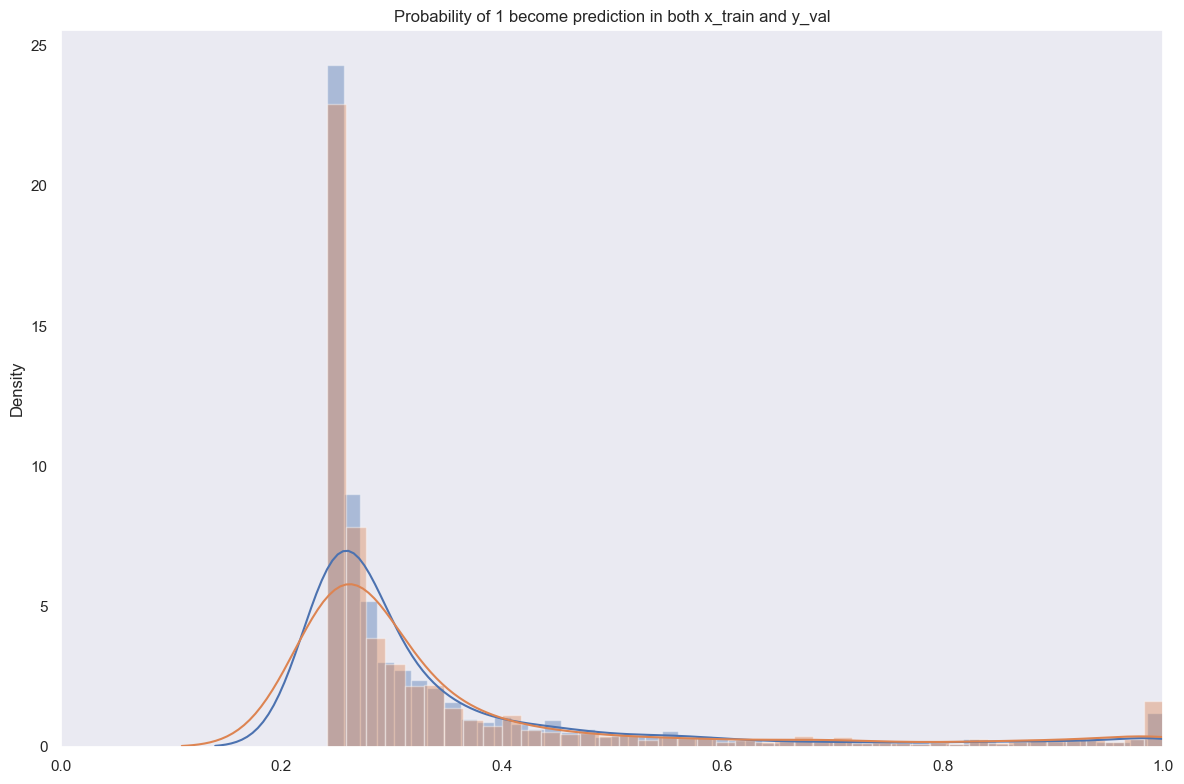

In [80]:
#lets check the model is overfitted or underfitted using distplot
plt.figure(figsize = (12,8))
sns.distplot(x_train_pred_prob[:,1])#we are only taking a 1's probability.
sns.distplot(x_val_pred_prob[:,1])
plt.title("Probability of 1 become prediction in both x_train and y_val")
plt.xlim([0,1])
plt.tight_layout()
plt.show()

#### Logistic Regression : ROC Curve

In [81]:
from sklearn.metrics import roc_curve,auc,precision_recall_curve

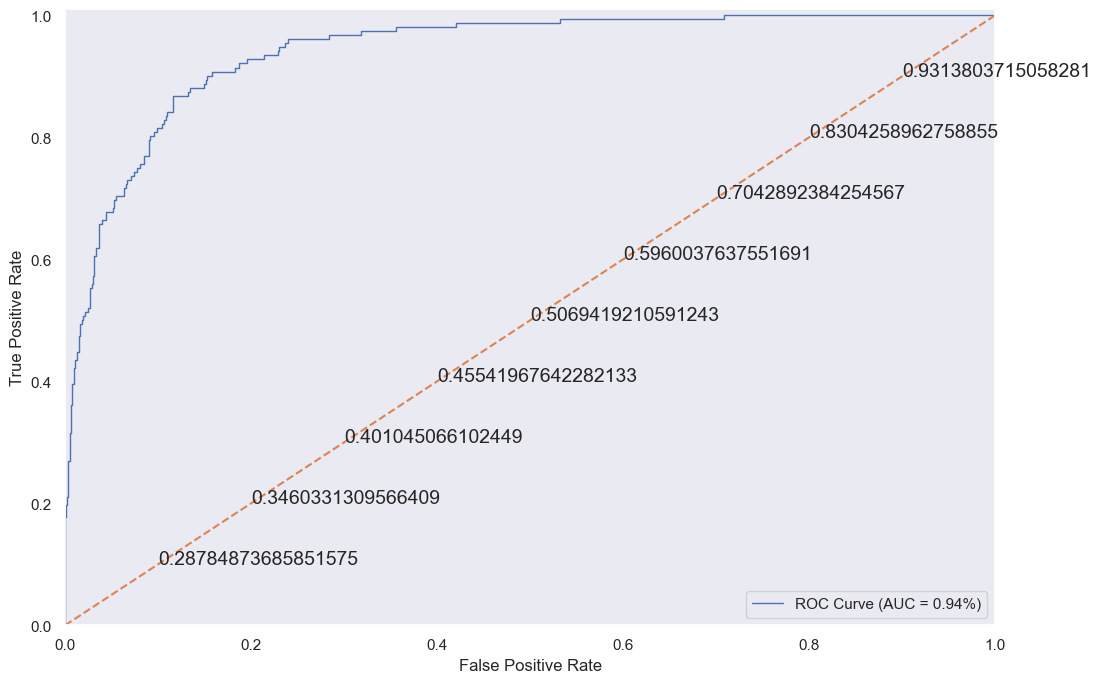

In [82]:
#roc_curve tests a different threshold and returns threshold value and their respective fpr and tpr.
fpr, tpr, thresholds = roc_curve(y_val,x_val_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,label = f'ROC Curve (AUC = {roc_auc:.2f}%)',lw = 1)
plt.plot([0,1],[0,1],ls = "--")

for label in range(1,10,1):
    x = (10 - label)/10
    y = (10 - label)/10
    plt.text(x,y,thresholds[label*15],fontdict={'size': 14})

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.01])
plt.legend()
plt.show()

***Logistic Regression : Precision VS Recall curve***

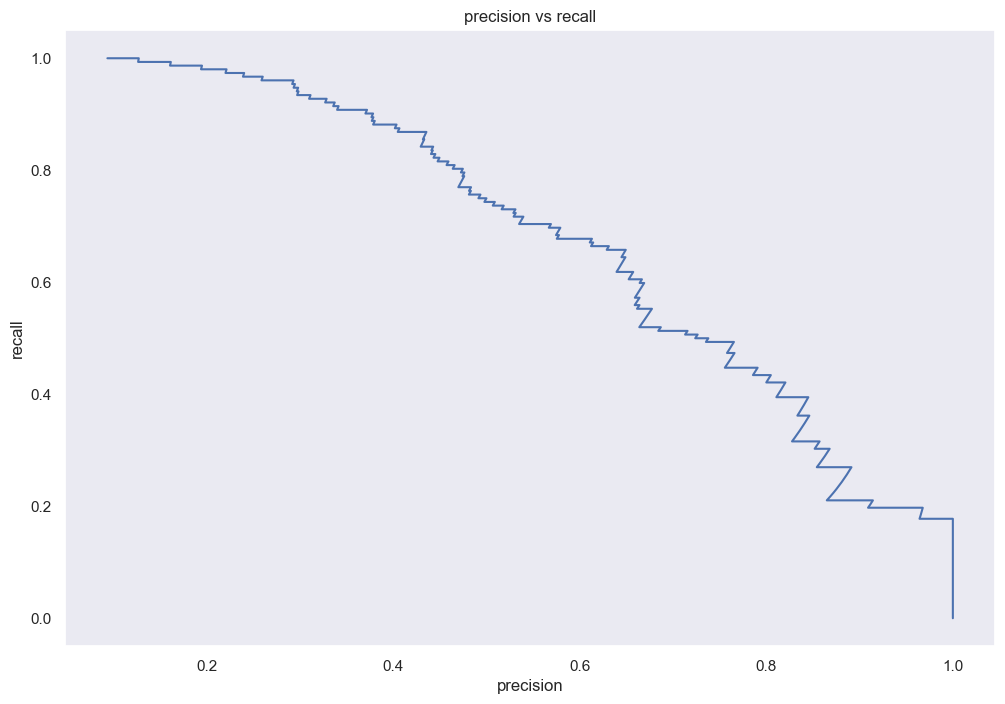

In [83]:
#here we are actually considering a fraud(1) positives only
precision,recall,threshold = precision_recall_curve(y_val,x_val_pred_prob[:,1])
plt.plot(precision,recall)
plt.xlabel("precision")
plt.ylabel("recall")
plt.title("precision vs recall")
plt.show()

***Checking the density of both Tpr and fpr***

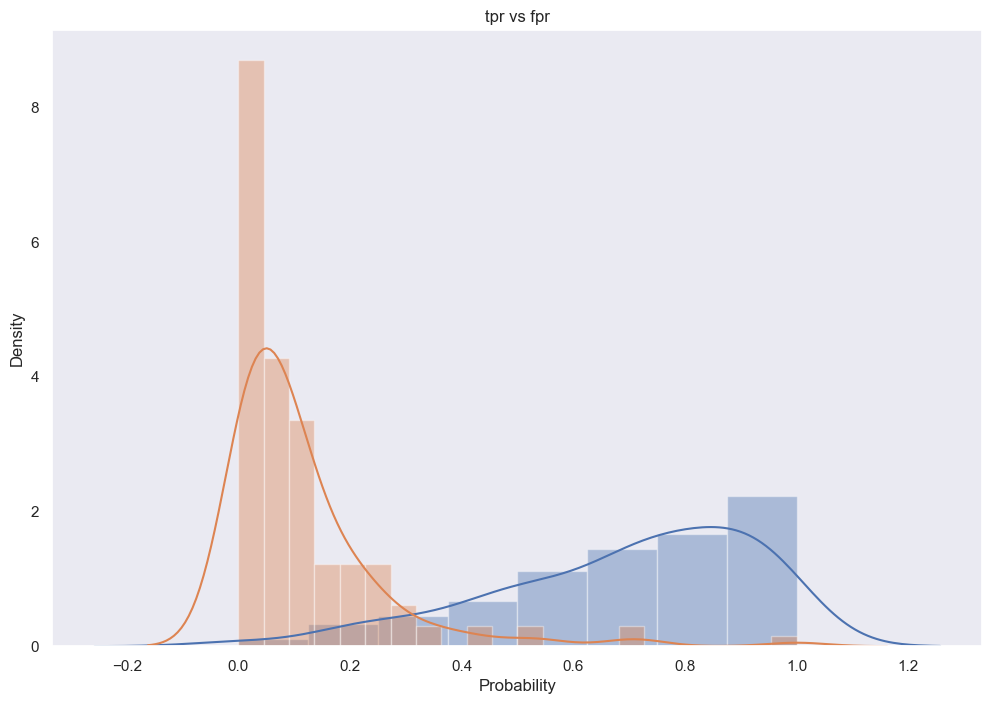

In [84]:
sns.distplot(tpr)
sns.distplot(fpr)
plt.title("tpr vs fpr")
plt.xlabel("Probability")
plt.ylabel("Density")
plt.show()

In [85]:
y_train[:5]

3482    0
835     0
1318    1
5348    0
3351    0
Name: PotentialFraud, dtype: int64

***Setting a probability threshold as 0.6***

In [86]:
#based on the threshold we find the fraud or not fraud
log_train_pred = (x_train_pred_prob[:,1] > 0.60)
log_val_pred = (x_val_pred_prob[:,1] > 0.60)

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

cm_train = confusion_matrix(y_train,log_train_pred,labels = [1,0])
cm_val = confusion_matrix(y_val,log_val_pred,labels = [1,0])
print("x train data confusion matrix:\n",cm_train)
print("x validation data confusion matrix:\n",cm_val)

accuracy_x_train = accuracy_score(y_train,log_train_pred)
accuracy_x_val = accuracy_score(y_val,log_val_pred)
print("x train data accuracy score:",accuracy_x_train)
print("x val data accuracy score:",accuracy_x_val)

prec_x_train = precision_score(y_train,log_train_pred)
prec_x_val = precision_score(y_val,log_val_pred)
print("x train data precision score:",prec_x_train)
print("x val data precision score:",prec_x_val)

recall_x_train = recall_score(y_train,log_train_pred)
recall_x_val = recall_score(y_val,log_val_pred)
print("x train data recall score:",recall_x_train)
print("x val data recall score:",recall_x_val)

f1_x_train = f1_score(y_train,log_train_pred)
f1_x_val = f1_score(y_val,log_val_pred)
print("x train data f1 score:",f1_x_train)
print("x val data f1 score:",f1_x_val)

print("area under curve for x_train data:",roc_auc_score(y_train,log_train_pred))
print("area under curve for x_val data:",roc_auc_score(y_val,log_val_pred))


x train data confusion matrix:
 [[ 206  148]
 [ 138 3295]]
x validation data confusion matrix:
 [[ 104   48]
 [  77 1394]]
x train data accuracy score: 0.9244784790071296
x val data accuracy score: 0.9229821318545902
x train data precision score: 0.5988372093023255
x val data precision score: 0.574585635359116
x train data recall score: 0.5819209039548022
x val data recall score: 0.6842105263157895
x train data f1 score: 0.5902578796561605
x val data f1 score: 0.6246246246246246
area under curve for x_train data: 0.7708614132357758
area under curve for x_val data: 0.8159325915059572


 ***Saving Logistic regression model***

In [88]:
# Save Logistic Regression model
joblib.dump(log_mod, 'logistic_regression_threshold_60.joblib')
joblib.dump(sc, 'logistic_regression_scaler.joblib')

# Save performance metrics
log_metrics = {
    'model_type': 'LogisticRegression',
    'threshold': 0.60,
    'train_accuracy': accuracy_x_train,
    'val_accuracy': accuracy_x_val,
    'train_f1': f1_x_train,
    'val_f1': f1_x_val
}

with open('logistic_regression_metadata.json', 'w') as f:
    json.dump(log_metrics, f, indent=2)

# Test loading
loaded_log_model = joblib.load('logistic_regression_threshold_60.joblib')
loaded_log_scaler = joblib.load('logistic_regression_scaler.joblib')
print("Logistic Regression saved successfully!")


Logistic Regression saved successfully!


***Test data prediction***

In [89]:
#test data prediction
log_test_pred = (log_mod.predict_proba(x_test_std)[:,1] > 0.60)
"""we convert it into a dataframe and replace the 1->yes and 0->no,then combine provider id with the predicted fraud or not"""
log_test_pred = pd.DataFrame(log_test_pred)
print(log_test_pred.head())
#replacing the value 1 with "Yes" and 0 with "No"
replacement = {1:"Yes",0:"No"}
labels = log_test_pred[0].apply(lambda x:replacement[x])
print(labels.value_counts())
labels.head()

       0
0  False
1  False
2  False
3  False
4  False
0
No     1222
Yes     131
Name: count, dtype: int64


0    No
1    No
2    No
3    No
4    No
Name: 0, dtype: object

In [90]:
#now we are combining a test_category_removed_groupedby_prov provider column and fraud or not prediction that we found above that is labels.
#And then save it as a submission log file.The file contains provider id and they are fraud or not
submission_log = pd.DataFrame({"Provider":test_category_removed_groupedby_prov.Provider})
submission_log["Potential_fraud"] = labels
print(submission_log.shape)
submission_log.head()

(1353, 2)


,Provider,Potential_fraud
0,PRV51002,No
1,PRV51006,No
2,PRV51009,No
3,PRV51010,No
4,PRV51018,No


In [91]:
#submission file
submission_log.to_csv("Submission_logistic_regresssion_threshold_60.csv",index = False)

### RandomForest

In [92]:
#lets try random forest to do the same
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500,class_weight = "balanced",random_state = 42,max_depth = 4)
rfc.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=500,
                       random_state=42)

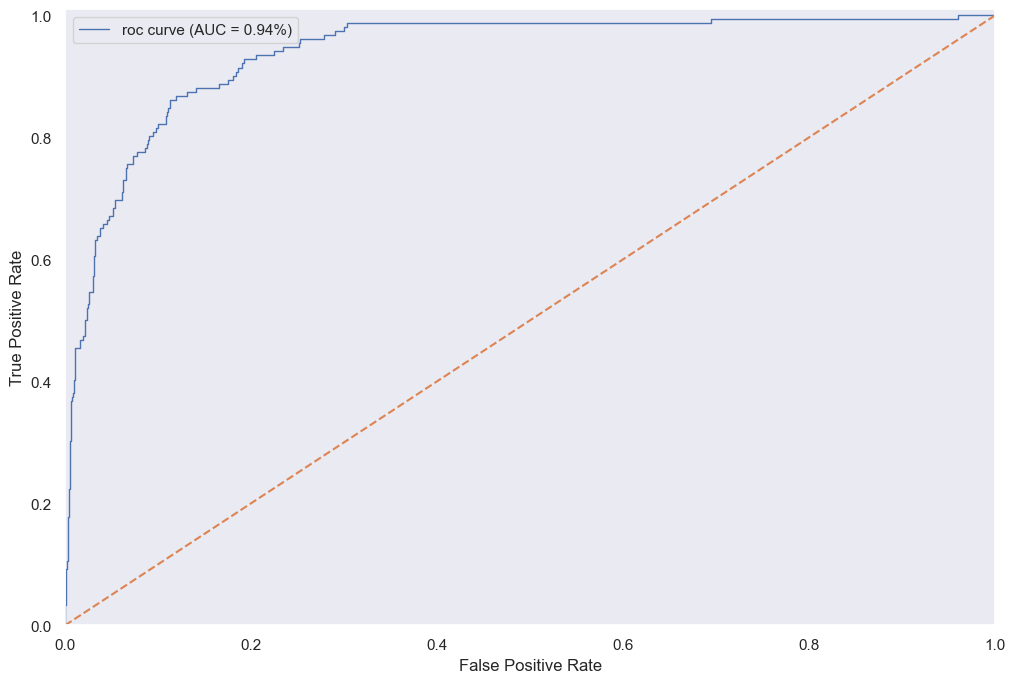

In [93]:
#roc curve 
x_val_pred_prob = rfc.predict_proba(x_val)
fpr,tpr,threshold = roc_curve(y_val,x_val_pred_prob[:,1])
roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr,lw = 1,label = f"roc curve (AUC = {roc_auc:.2f}%)")
plt.plot([0,1],[0,1],ls = "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.01])
plt.legend()
plt.show()

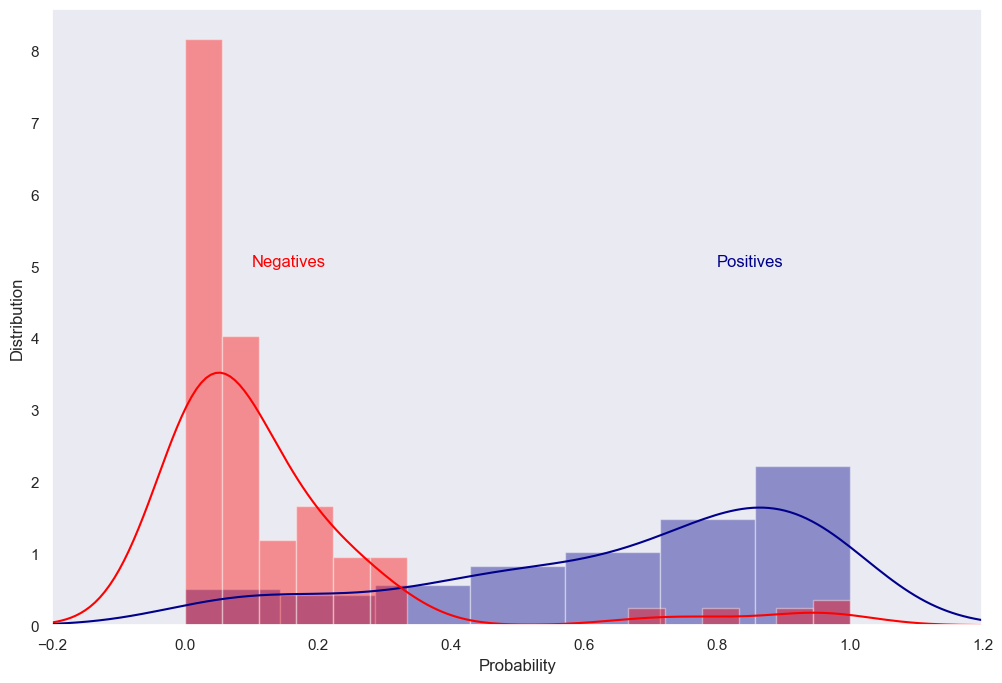

In [94]:
#distribution plot for both fpr and tpr
sns.distplot(tpr,color = "darkblue")
sns.distplot(fpr,color = "red")
plt.text(0.1,5,"Negatives",color = "red")
plt.text(0.8,5,"Positives",color = "darkblue")
plt.xlabel("Probability")
plt.xlim([-0.2,1.2])
plt.ylabel("Distribution")
plt.show()

In [95]:
#by default threshold is 0.5 so we don't need to choose a thresholt
rfc_train_pred = rfc.predict(x_train)
rfc_val_pred = rfc.predict(x_val)

***RandomForest : Model Evaluation***

In [96]:
#model evaluation
rfc_cm_train = confusion_matrix(y_train,rfc_train_pred,labels = [1,0])
rfc_cm_val = confusion_matrix(y_val,rfc_val_pred,labels = [1,0])
print("Random forest train data prediction confusion matrix:\n",rfc_cm_train)
print("Random forest val data prediction confusion matrix:\n",rfc_cm_val)

print("Random forest train data prediction accuracy score:",accuracy_score(y_train,rfc_train_pred))
print("Random forest val data prediction accuracy score:",accuracy_score(y_val,rfc_val_pred))

print("Random forest train data prediction precision score:",accuracy_score(y_train,rfc_train_pred))
print("Random forest val data prediction precision score:",accuracy_score(y_val,rfc_val_pred))

print("Random forest train data prediction recall score:",recall_score(y_train,rfc_train_pred))
print("Random forest val data prediction recall score:",recall_score(y_val,rfc_val_pred))

print("Random forest train data prediction f1 score:",f1_score(y_train,rfc_train_pred))
print("Random forest val data prediction f1 score:",f1_score(y_val,rfc_val_pred))

print("Random forest train data prediction area under curve score:",roc_auc_score(y_train,rfc_train_pred))
print("Random forest val data prediction area under curve score:",roc_auc_score(y_val,rfc_val_pred))


Random forest train data prediction confusion matrix:
 [[ 320   34]
 [ 441 2992]]
Random forest val data prediction confusion matrix:
 [[ 132   20]
 [ 188 1283]]
Random forest train data prediction accuracy score: 0.8745709004489042
Random forest val data prediction accuracy score: 0.8718422674060382
Random forest train data prediction precision score: 0.8745709004489042
Random forest val data prediction precision score: 0.8718422674060382
Random forest train data prediction recall score: 0.903954802259887
Random forest val data prediction recall score: 0.868421052631579
Random forest train data prediction f1 score: 0.5739910313901345
Random forest val data prediction f1 score: 0.559322033898305
Random forest train data prediction area under curve score: 0.8877478642817059
Random forest val data prediction area under curve score: 0.8703084189058644


In [97]:
#RandomForestFeature importance
feature_list = list(test_category_removed_groupedby_prov.columns[1:])#here the providerid column also included so we have to remove it because we removed that column in the dataset given to the model. 
print(feature_list[:5])
importances = list(rfc.feature_importances_)#this returns feature importance scores in the order that we given the data to the model.
print(importances[:5])
#using zip function we merge the feature name and their importances
feature_importances = [(feature,round(score,2))for feature,score in zip(feature_list,importances)]
#creating a dataframe 
df_feature_importances = pd.DataFrame(feature_importances,columns = ["Features","Scores"])
df_feature_importances.set_index("Features",inplace = True)
#now sorting the dataframe based on the scores of the feature
df_feature_importances = df_feature_importances.sort_values(by = "Scores",ascending = False)
df_feature_importances.head()

['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'Admit_For_Days', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov']
[0.06173430642303954, 0.024134482898411, 0.024047052156799933, 0.00040665088038817544, 0.001084515802592214]


,Scores
Features,
PerOperatingPhysicianAvg_InscClaimAmtReimbursed,0.08
PerProviderAvg_InscClaimAmtReimbursed,0.07
PerAttendingPhysicianAvg_InscClaimAmtReimbursed,0.07
InscClaimAmtReimbursed,0.06
PerAttendingPhysicianAvg_DeductibleAmtPaid,0.03


***Saving RandomForestClassifier model***

In [98]:
# Save Random Forest model without 
joblib.dump(rfc, 'random_forest.joblib')
joblib.dump(sc, 'random_forest_scaler.joblib')  # Same scaler as logistic regression

# Save performance metrics
rf_metrics = {
    'model_type': 'RandomForest',
    'n_estimators': 500,
    'max_depth': 4,
    'train_accuracy': accuracy_score(y_train, rfc_train_pred),
    'val_accuracy': accuracy_score(y_val, rfc_val_pred),
    'train_f1': f1_score(y_train, rfc_train_pred),
    'val_f1': f1_score(y_val, rfc_val_pred)
}

with open('random_forest_metadata.json', 'w') as f:
    json.dump(rf_metrics, f, indent=2)

# Test loading
loaded_rf_model = joblib.load('random_forest.joblib')
loaded_rf_scaler = joblib.load('random_forest_scaler.joblib')
print("Random Forest saved successfully")


Random Forest saved successfully


***Random Forest : Prediction of Test Data***

In [99]:
#prediction of test data
rfc_test_prediction = rfc.predict(x_test_std)
print(rfc_test_prediction[:5])
#merging the predicted values with their respective providerid
merged_prov_pf = pd.DataFrame({
    "Provider":test_category_removed_groupedby_prov.Provider,
    "PotentialFraud":rfc_test_prediction})
#replace 1 and 0 with yes and no
merged_prov_pf["PotentialFraud"] = merged_prov_pf["PotentialFraud"].replace({0:"No",1:"Yes"})
merged_prov_pf.head()

[0 0 0 0 0]


,Provider,PotentialFraud
0,PRV51002,No
1,PRV51006,No
2,PRV51009,No
3,PRV51010,No
4,PRV51018,No


In [100]:
#submission
print(merged_prov_pf.shape)
merged_prov_pf.to_csv("Submission_Random_Forest_Classifier.csv",index = False) 

(1353, 2)


### Lets try some Unsupervised Learning models if we get a better result.

### principal Component Analysis

In [101]:
train_category_removed_groupedby_prov.head(2)

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Admit_For_Days,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_Admit_For_Days,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_Admit_For_Days,PerOtherPhysicianAvg_InscClaimAmtReimbursed,PerOtherPhysicianAvg_DeductibleAmtPaid,PerOtherPhysicianAvg_IPAnnualReimbursementAmt,PerOtherPhysicianAvg_IPAnnualDeductibleAmt,PerOtherPhysicianAvg_OPAnnualReimbursementAmt,PerOtherPhysicianAvg_OPAnnualDeductibleAmt,PerOtherPhysicianAvg_Admit_For_Days,PerOperatingPhysicianAvg_InscClaimAmtReimbursed,PerOperatingPhysicianAvg_DeductibleAmtPaid,PerOperatingPhysicianAvg_IPAnnualReimbursementAmt,PerOperatingPhysicianAvg_IPAnnualDeductibleAmt,PerOperatingPhysicianAvg_OPAnnualReimbursementAmt,PerOperatingPhysicianAvg_OPAnnualDeductibleAmt,PerOperatingPhysicianAvg_Admit_For_Days,PerAttendingPhysicianAvg_InscClaimAmtReimbursed,PerAttendingPhysicianAvg_DeductibleAmtPaid,PerAttendingPhysicianAvg_IPAnnualReimbursementAmt,PerAttendingPhysicianAvg_IPAnnualDeductibleAmt,PerAttendingPhysicianAvg_OPAnnualReimbursementAmt,PerAttendingPhysicianAvg_OPAnnualDeductibleAmt,PerAttendingPhysicianAvg_Admit_For_Days,PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed,PerDiagnosisGroupCodeAvg_DeductibleAmtPaid,PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_Admit_For_Days,PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid,PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_Admit_For_Days,PerClmProcedureCode_1Avg_InscClaimAmtReimbursed,PerClmProcedureCode_1Avg_DeductibleAmtPaid,PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_Admit_For_Days,PerClmProcedureCode_2Avg_InscClaimAmtReimbursed,PerClmProcedureCode_2Avg_DeductibleAmtPaid,PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_2Avg_Admit_For_Days,PerClmProcedureCode_3Avg_InscClaimAmtReimbursed,PerClmProcedureCode_3Avg_DeductibleAmtPaid,PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_3Avg_Admit_For_Days,PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_1Avg_DeductibleAmtPaid,PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_Admit_For_Days,P

In [102]:
test_category_removed_groupedby_prov.head(2)

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Admit_For_Days,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_Admit_For_Days,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_Admit_For_Days,PerOtherPhysicianAvg_InscClaimAmtReimbursed,PerOtherPhysicianAvg_DeductibleAmtPaid,PerOtherPhysicianAvg_IPAnnualReimbursementAmt,PerOtherPhysicianAvg_IPAnnualDeductibleAmt,PerOtherPhysicianAvg_OPAnnualReimbursementAmt,PerOtherPhysicianAvg_OPAnnualDeductibleAmt,PerOtherPhysicianAvg_Admit_For_Days,PerOperatingPhysicianAvg_InscClaimAmtReimbursed,PerOperatingPhysicianAvg_DeductibleAmtPaid,PerOperatingPhysicianAvg_IPAnnualReimbursementAmt,PerOperatingPhysicianAvg_IPAnnualDeductibleAmt,PerOperatingPhysicianAvg_OPAnnualReimbursementAmt,PerOperatingPhysicianAvg_OPAnnualDeductibleAmt,PerOperatingPhysicianAvg_Admit_For_Days,PerAttendingPhysicianAvg_InscClaimAmtReimbursed,PerAttendingPhysicianAvg_DeductibleAmtPaid,PerAttendingPhysicianAvg_IPAnnualReimbursementAmt,PerAttendingPhysicianAvg_IPAnnualDeductibleAmt,PerAttendingPhysicianAvg_OPAnnualReimbursementAmt,PerAttendingPhysicianAvg_OPAnnualDeductibleAmt,PerAttendingPhysicianAvg_Admit_For_Days,PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed,PerDiagnosisGroupCodeAvg_DeductibleAmtPaid,PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt,PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt,PerDiagnosisGroupCodeAvg_Admit_For_Days,PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid,PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_Admit_For_Days,PerClmProcedureCode_1Avg_InscClaimAmtReimbursed,PerClmProcedureCode_1Avg_DeductibleAmtPaid,PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_Admit_For_Days,PerClmProcedureCode_2Avg_InscClaimAmtReimbursed,PerClmProcedureCode_2Avg_DeductibleAmtPaid,PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_2Avg_Admit_For_Days,PerClmProcedureCode_3Avg_InscClaimAmtReimbursed,PerClmProcedureCode_3Avg_DeductibleAmtPaid,PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_3Avg_Admit_For_Days,PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_1Avg_DeductibleAmtPaid,PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_Admit_For_Days,PerClmDiagnosisC

In [103]:
#Standardizing a  both train and val data 
std = StandardScaler()
std.fit(train_category_removed_groupedby_prov.iloc[:,2:])#for train data we are removing provider and potentialfraud columns.
train_category_removed_groupedby_prov_scaled = std.transform(train_category_removed_groupedby_prov.iloc[:,2:])
test_category_removed_groupedby_prov_scaled = std.transform(test_category_removed_groupedby_prov.iloc[:,1:])#here we removed a provider column because id doesn't give any value to model.
#converting both the scaled into dataframe
train_category_removed_groupedby_prov_scaled = pd.DataFrame(train_category_removed_groupedby_prov_scaled)
test_category_removed_groupedby_prov_scaled = pd.DataFrame(test_category_removed_groupedby_prov_scaled)
print(train_category_removed_groupedby_prov_scaled.shape)
print(test_category_removed_groupedby_prov_scaled.shape)

(5410, 156)
(1353, 156)


In [104]:
#PCA Maximum Variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 29)
pca.fit(train_category_removed_groupedby_prov_scaled)

PCA(n_components=29)

In [105]:
#pca.explained_variance_ratio_ returns the variance of each fitted data.
#np.round is just like a round()
print("pca explained variance :\n",np.round(pca.explained_variance_ratio_,3))
#now transform both train and test data and then the total number of datapoints decomposeto the given datapoints
train_pca = pca.transform(train_category_removed_groupedby_prov_scaled)
test_pca = pca.transform(test_category_removed_groupedby_prov_scaled)
print("train pca shape:",train_pca.shape)
print("test pca shape:",test_pca.shape)

pca explained variance :
 [0.686 0.218 0.024 0.015 0.009 0.007 0.005 0.004 0.004 0.003 0.003 0.002
 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.    0.    0.    0.    0.   ]
train pca shape: (5410, 29)
test pca shape: (1353, 29)


In [106]:
#now converting both train and test data into dataframe
train_pca = pd.DataFrame(train_pca)
test_pca = pd.DataFrame(test_pca)
print("train pca dataframe:",train_pca.head())
print("test pca dataframe:",test_pca.head())
#Now adding a potential fraud column that we removed before a train a data now we are adding that again into a pca.
train_pca["PotentialFraud"] = train_category_removed_groupedby_prov.PotentialFraud
train_pca.to_csv("train_pca.csv",index = False)
test_pca.to_csv("test_pca.csv",index = False)
train_pca.head()

train pca dataframe:           0          1         2         3         4         5         6   \
0  -2.392832   0.339081  0.170838 -0.578502  0.199659  0.097188  0.292168   
1   9.054236   9.842674 -0.519321 -4.510588 -4.187689 -0.024749 -0.288515   
2  -0.011515  -2.046151 -0.716978  0.146993  0.017184 -0.050673 -0.091485   
3  27.556811 -15.327474 -6.246961  1.948628 -1.010868 -0.633404  0.175226   
4  -2.129760  -0.780021 -0.077544 -0.084201 -0.095472 -0.049679 -0.434814   

         7         8         9         10        11        12        13  \
0  0.068517 -0.030015 -0.115047 -0.272288 -0.134875 -0.148035 -0.057742   
1  0.383274  0.371051 -0.307124 -0.122757  0.794857 -0.281884  0.272160   
2 -0.276244  0.061555 -0.071442 -0.004100 -0.142852 -0.221135 -0.035837   
3 -2.861287  0.735608 -2.526891 -1.305227 -0.605412 -2.293222 -0.591151   
4 -0.030702 -0.006299 -0.114903 -0.014086 -0.133157  0.262486  0.041877   

         14        15        16        17        18        19    

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,PotentialFraud
0,-2.392832,0.339081,0.170838,-0.578502,0.199659,0.097188,0.292168,0.068517,-0.030015,-0.115047,-0.272288,-0.134875,-0.148035,-0.057742,0.035903,-0.060081,-0.105874,0.412023,0.051531,-0.128119,-0.089666,-0.039515,-0.017879,0.104615,-0.170995,-0.028010,-0.179131,0.441881,-0.277804,0
1,9.054236,9.842674,-0.519321,-4.510588,-4.187689,-0.024749,-0.288515,0.383274,0.371051,-0.307124,-0.122757,0.794857,-0.281884,0.272160,0.186084,0.471497,0.738601,-0.659486,0.482853,0.629247,0.292431,-0.131846,-0.167421,0.235522,0.136650,-0.675660,0.149829,-0.504209,-0.214313,1
2,-0.011515,-2.046151,-0.716978,0.146993,0.017184,-0.050673,-0.091485,-0.276244,0.061555,-0.071442,-0.004100,-0.142852,-0.221135,-0.035837,0.089332,0.311270,-0.111524,-0.011744,0.060820,-0.006633,-0.014098,-0.195678,0.098300,0.182507,0.007985,0.089135,0.045472,0.041423,-0.040561,0
3,27.556811,-15.327474,-6.246961,1.948628,-1.010868,-0.633404,0.175226,-2.861287,0.735608,-2.526891,-1.305227,-0.605412,-2.293222,-0.591151,-2.254334,2.462120,0.523095,-0.658716,-1.976646,3.141195,-1.059919,0.654924,0.776949,0.585365,0.532635,-0.022620,-0.302223,0.349486,0.304273,1
4,-2.129760,-0.780021,-0.077544,-0.084201,-0.095472,-0.049679,-0.434814,-0.030702,-0.006299,-0.114903,-0.014086,-0.133157,0.262486,0.041877,-0.126635,0.092401,0.226672,0.021140,-0.235705,0.100802,0.039113,-0.130931,-0.033662,0.046311,-0.025275,0.158944,0.038462,-0.041066,0.015619,0


In [107]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Split out features and label from your PCA DataFrame
X_pca_train = train_pca.drop(columns="PotentialFraud")
y_pca_train = train_pca["PotentialFraud"].astype(int)   # target

# Fit Isolation Forest (unsupervised!)
iso = IsolationForest(
    n_estimators    = 100,
    contamination   = 0.09,
    random_state    = 42
)
iso.fit(X_pca_train)

# Predict on TRAIN to see how well it isolates known fraud
# -1 → anomaly (fraud), +1 → normal
raw_train_pred = iso.predict(X_pca_train)
y_train_if = (raw_train_pred == -1).astype(int)


***Isolation Forest : Model Evaluation***

In [108]:
print("=== Train Classification Report ===\n")
print(classification_report(y_pca_train, y_train_if,
      target_names=["Normal","Fraud"]))

cm = confusion_matrix(y_pca_train, y_train_if, labels=[0,1])
print("=== Train Confusion Matrix ===")
print(pd.DataFrame(cm,
                   index=["TrueNormal","TrueFraud"],
                   columns=["PredNormal","PredFraud"]))


=== Train Classification Report ===

              precision    recall  f1-score   support

      Normal       0.95      0.96      0.95      4904
       Fraud       0.55      0.53      0.54       506

    accuracy                           0.92      5410
   macro avg       0.75      0.74      0.75      5410
weighted avg       0.91      0.92      0.91      5410

=== Train Confusion Matrix ===
            PredNormal  PredFraud
TrueNormal        4684        220
TrueFraud          239        267


***Saving a IsolationForest Model***

In [109]:
# Save Isolation Forest model using joblib
joblib.dump(iso, 'isolation_forest.joblib')
joblib.dump(std, 'isolation_forest_pca_scaler.joblib')  # PCA scaler
joblib.dump(pca, 'isolation_forest_pca_transformer.joblib')  # PCA transformer

# Saving a metrics as a json file
iso_metrics = {
    'model_type': 'IsolationForest',
    'contamination': 0.09,
    'n_estimators': 100,
    'pca_components': 29
}

with open('isolation_forest_metadata.json', 'w') as f:
    json.dump(iso_metrics, f, indent=2)

# loading a svaed model
loaded_iso_model = joblib.load('isolation_forest.joblib')
loaded_iso_scaler = joblib.load('isolation_forest_pca_scaler.joblib')
loaded_pca = joblib.load('isolation_forest_pca_transformer.joblib')
print("Isolation Forest saved successfully")


Isolation Forest saved successfully


In [110]:
# Now predict the test data and create a submission file
X_pca_test = test_pca.copy()   # your 1353×29 PCA DataFrame
raw_test_pred = iso.predict(X_pca_test)
y_test_if = (raw_test_pred == -1).astype(int)

#
submission = pd.DataFrame({
    "Provider"       : test_category_removed_groupedby_prov["Provider"],
    "PotentialFraud" : np.where(y_test_if==1, "Yes", "No")
})
print(submission.shape)
submission.to_csv("Submission_Isolation_Forest.csv",index = False) 
print("\nSubmission value counts:")
print(submission["PotentialFraud"].value_counts())
submission.head()

(1353, 2)

Submission value counts:
PotentialFraud
No     1239
Yes     114
Name: count, dtype: int64


,Provider,PotentialFraud
0,PRV51002,No
1,PRV51006,No
2,PRV51009,No
3,PRV51010,No
4,PRV51018,No
